In [ ]:
!pip install numpy pandas optuna catboost seaborn imblearn stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24284 sha256=51980d81fb21371e74f41b2a8e4491f754dc0d144955cc2db463bbdb3a0f914b
  Stored in directory: /root/.cache/pip/wheels/57/7d/91/f1d0158783f74ab6ad725b00aa6a2c6e976cea652eb72616c6
Successfully built stats


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, roc_auc_score
import stats

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,personal_statement,accepted
0,24,Россия,Санкт-Петербург,9,0,7127004,1f63c614a798186e5b5dbca02201a070,21.0,06c4288fba116e49f49d82a16184fca6,NaN,0.0
1,21,Казахстан,Астана,5,0,6264436,99fec0c12216abee9eec3bee2138754f,29.0,45273a0d372f7f2747afc98bdc63c31a,NaN,1.0
2,17,Россия,Тула,3,0,9056805,f733e24fc7ae975aab7c3e092b1ae96c,89.0,773c820049150b6854691b5e7fdcd63f,NaN,0.0
3,20,Украина,Киев,1,0,8857612,a2b7795cd58502654754ce03163a1685,2.0,d07f757f1b51f8b9189a84298b142794,NaN,0.0
4,19,Россия,Пермь,8,0,6422527,90519fbbfd457329160e9c1767cb0a86,23.0,269f19b2ef9f46af5012931bfd4acf22,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95995,21,Россия,Улан-Удэ,5,5,2019496,e065aa14d0861cb2e8c227049bc0b1d3,73.0,4c33d89befc11bea800221a9d8719549,NaN,1.0
95996,18,Казахстан,Шымкент,9,5,1202270,de6753fb488b87117296d8bef2edc7b3,91.0,b76e187984d8b80264b4c97fac124f84,NaN,0.0
95997,18,Россия,Владивосток,14,5,4114792,7ebd9ffcf2f9f0fbe6cfd54917af2098,31.0,750e34ebbf17be247c9184149109cbdd,NaN,1.0
95998,20,Украина,Запорожье,2,5,5024696,a2b7795cd58502654754ce03163a1685,45.0,0a17ffcb17a2ffd2eb185ac793ed444e,NaN,1.0


In [ ]:
train = train.drop(columns='personal_statement')

In [ ]:
train['accepted'].value_counts() #0 в два раза больше 1
train.duplicated().sum() #0

0

In [ ]:
train.hist(bins=50, figsize=(10, 10))

In [ ]:
df = train

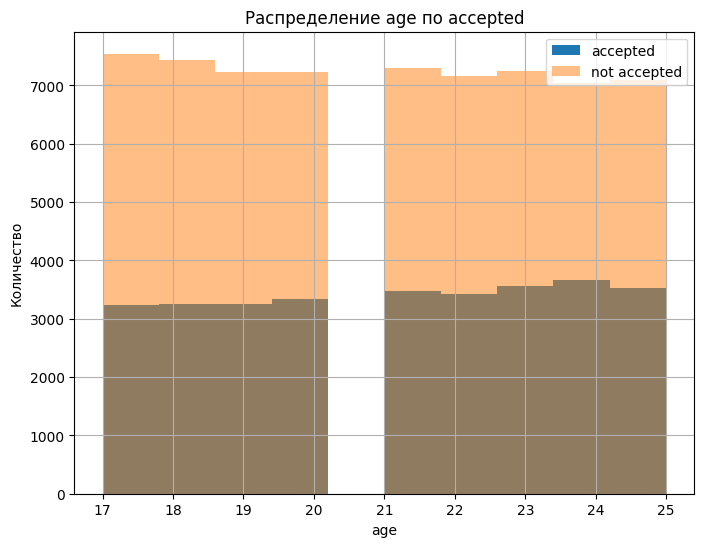

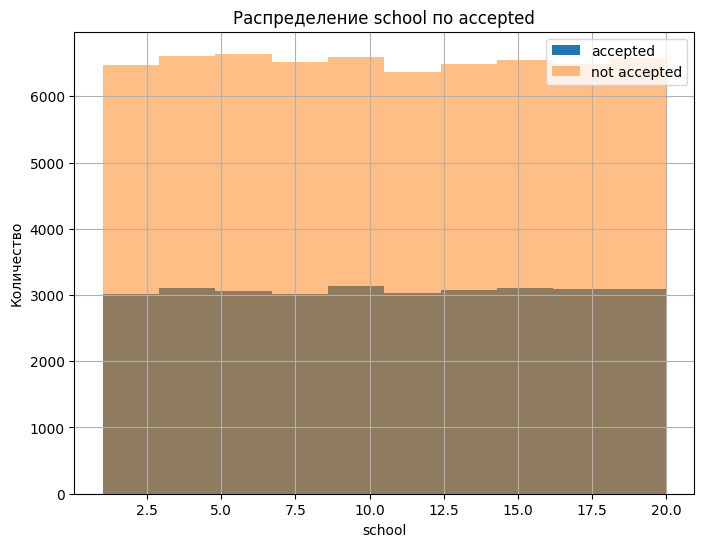

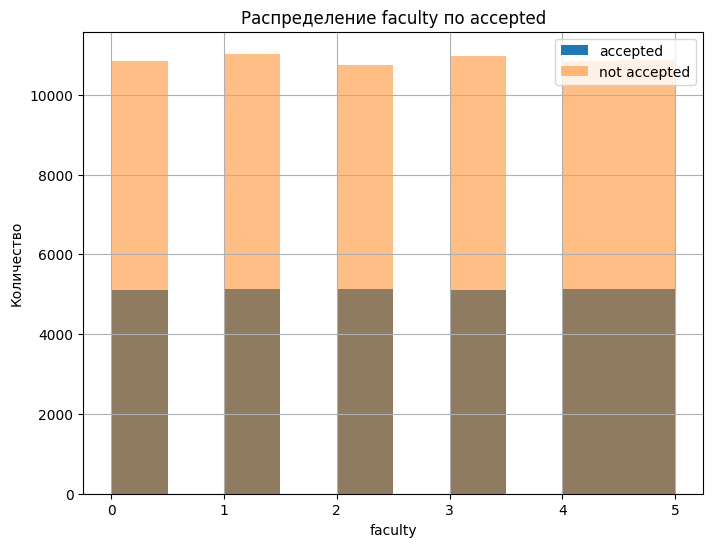

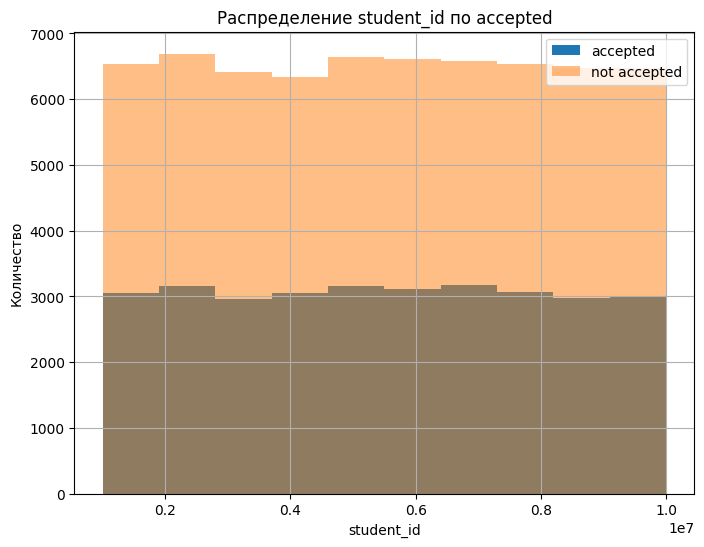

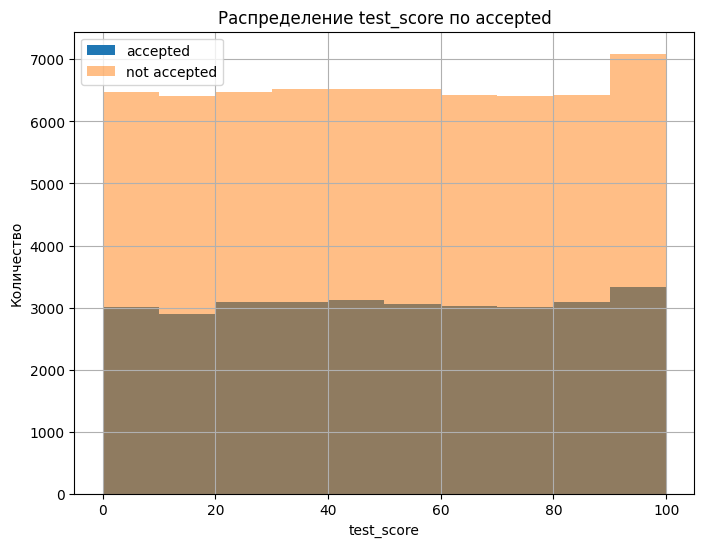

In [ ]:
for column in df.select_dtypes(include=['number']).columns:
    if column != 'accepted':
        plt.figure(figsize=(8, 6))
        df[df['accepted'] == 1][column].hist(alpha=1, label='accepted') # alpha - прозрачность
        df[df['accepted'] == 0][column].hist(alpha=0.5, label='not accepted')
        plt.xlabel(column)
        plt.ylabel('Количество')
        plt.title(f'Распределение {column} по accepted')
        plt.legend()
        plt.show()


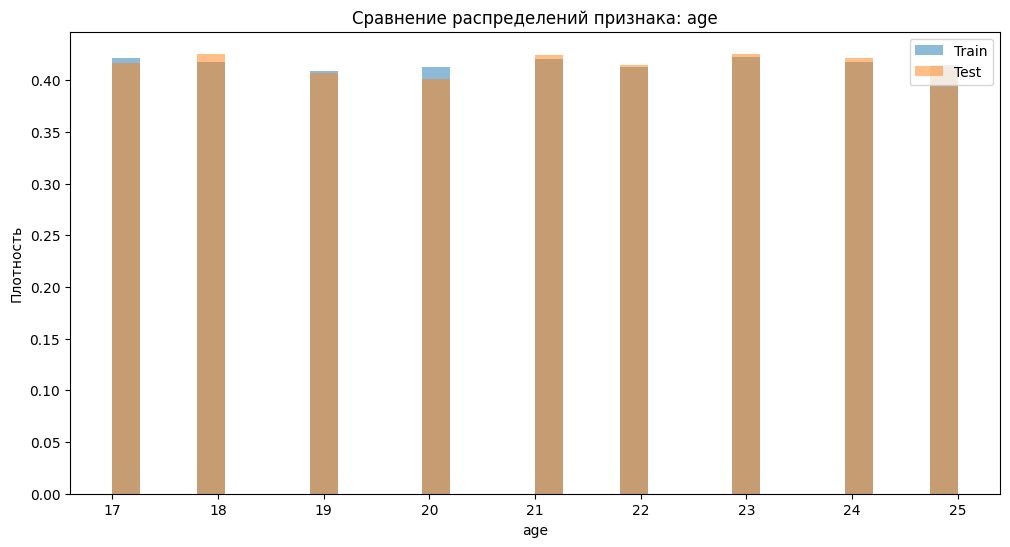

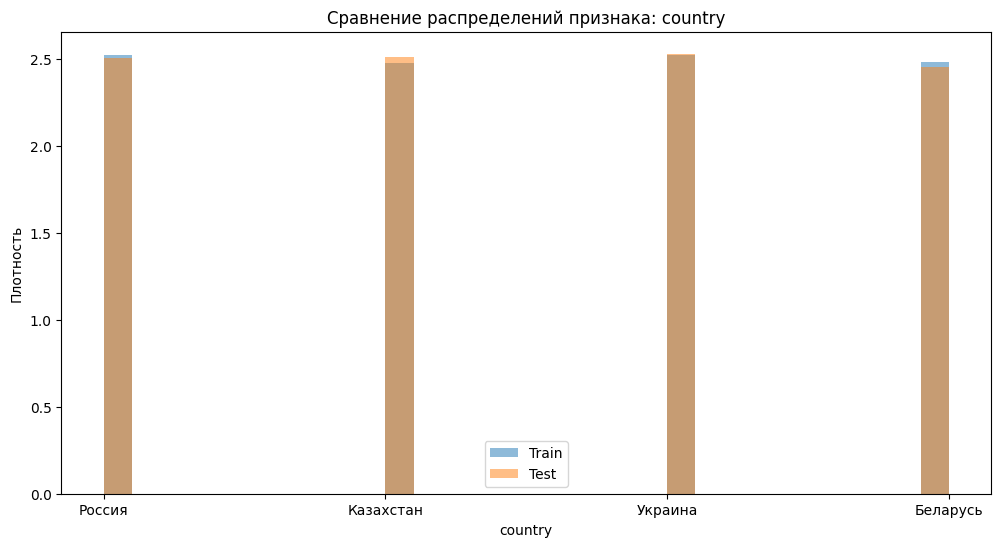

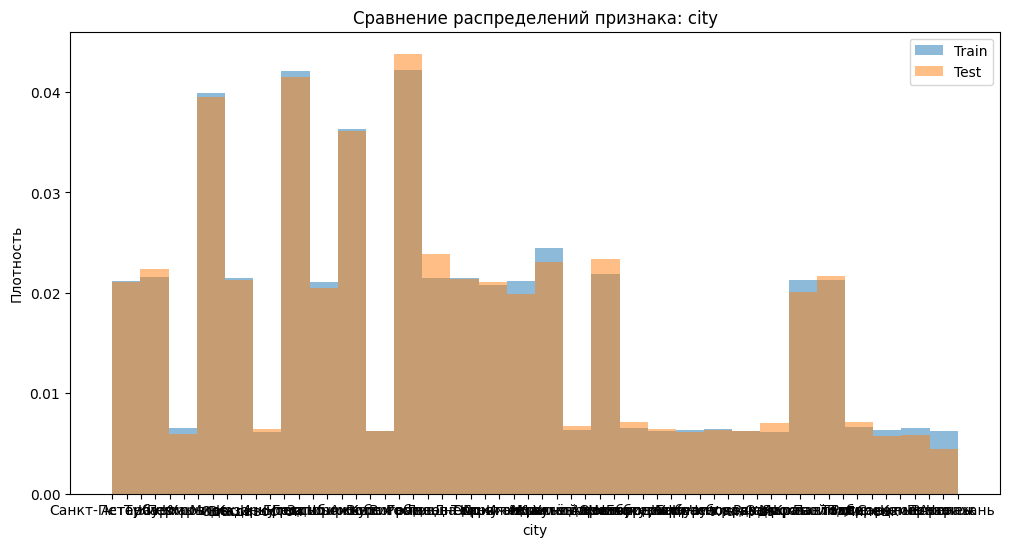

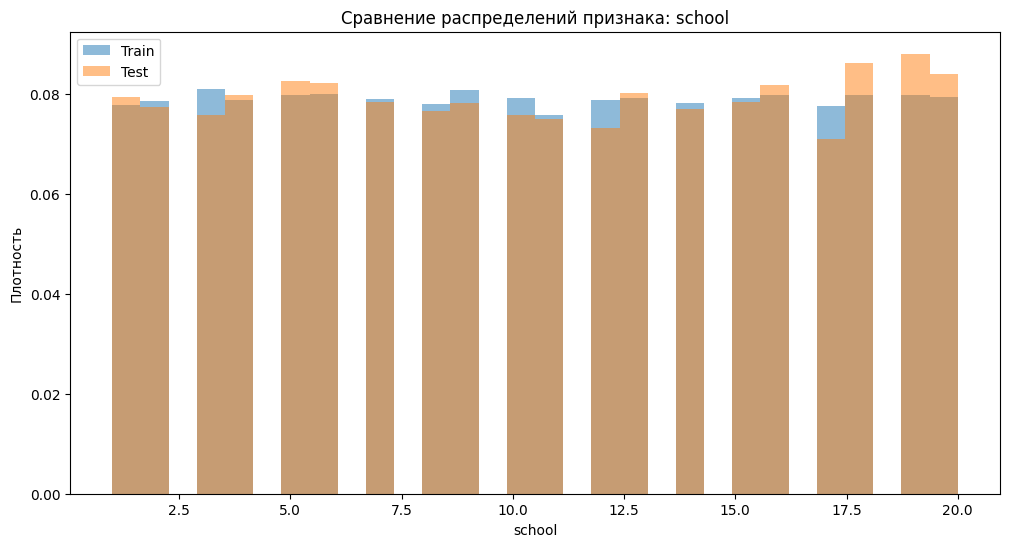

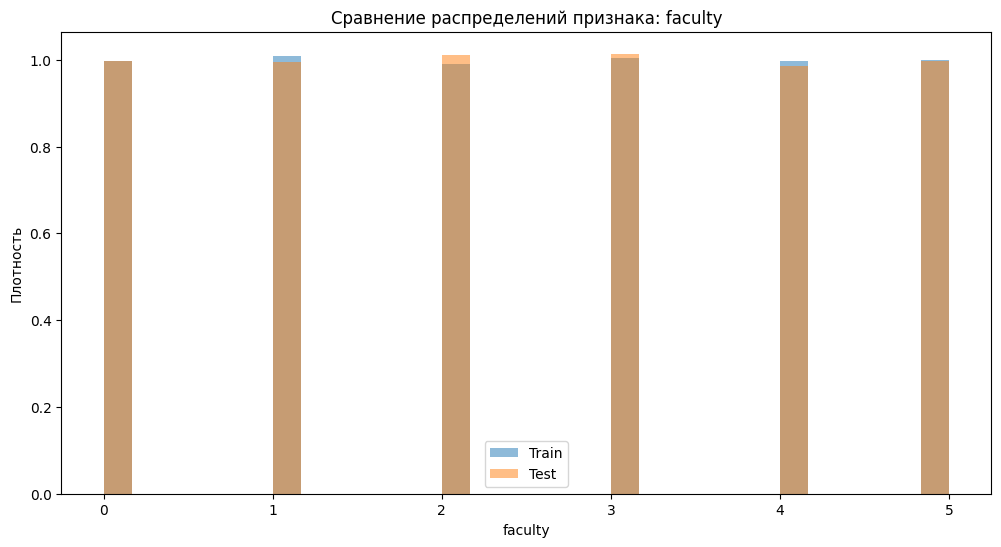

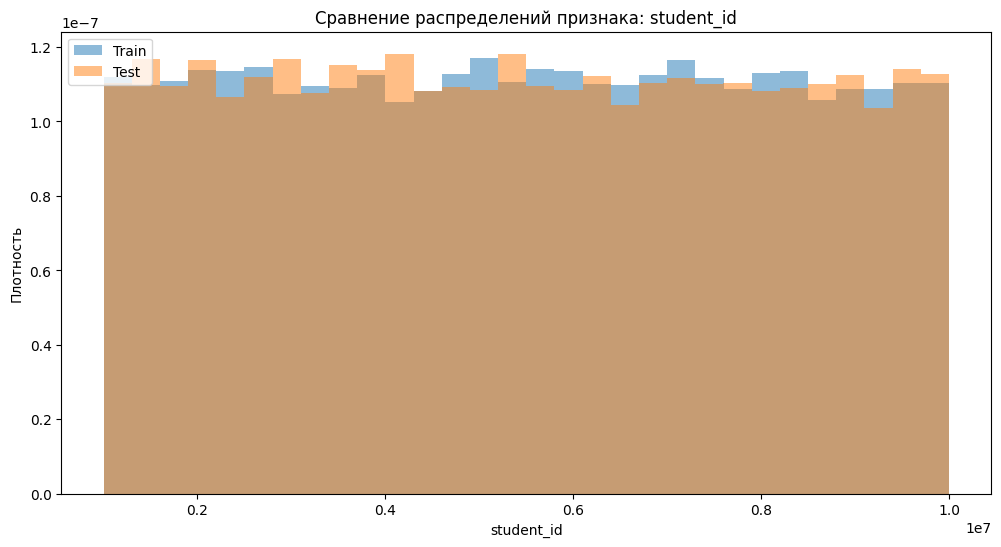

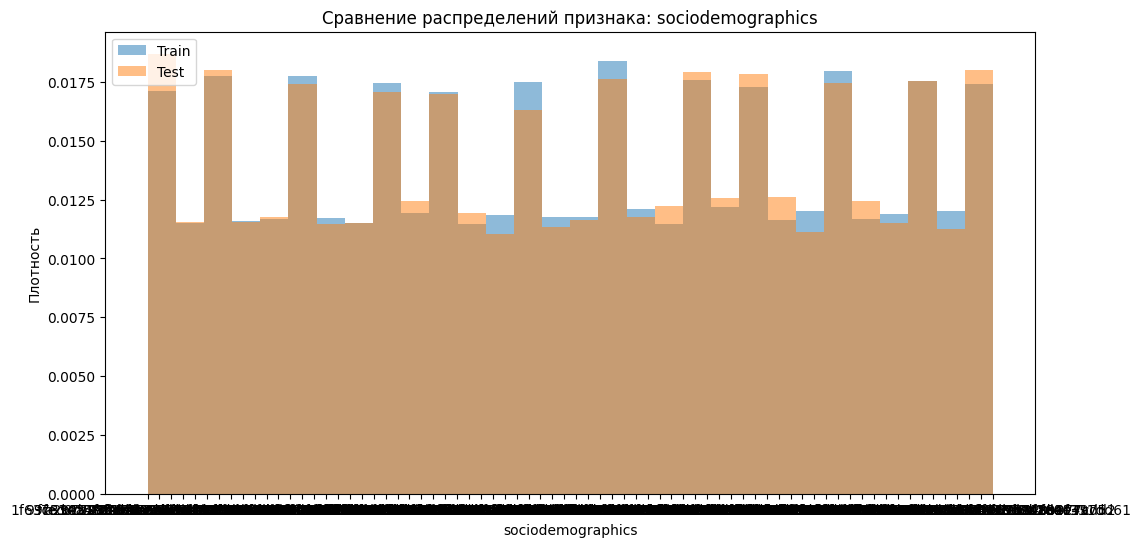

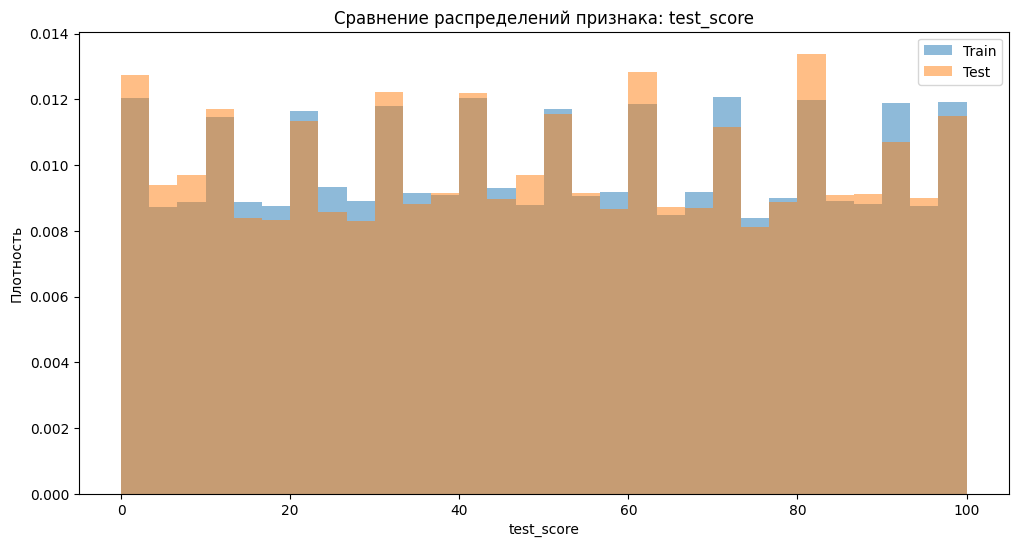

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-26a37f19b7d0>", line 11, in <cell line: 0>
    plt.show()
  File "/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py", line 614, in show
    return _get_backend_mod().show(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/display.py", line 320, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
           ^^^^^^^^^^^^^^
  File "<decorator-gen-

TypeError: object of type 'NoneType' has no len()

In [ ]:
for column in df.drop(columns='target').columns:
    if column != 'accepted':# Визуализация распределений
      feature = column
      plt.figure(figsize=(12, 6))
      plt.hist(train[feature], bins=30, alpha=0.5, label='Train', density=True)
      plt.hist(test[feature], bins=30, alpha=0.5, label='Test', density=True)
      plt.title(f'Сравнение распределений признака: {feature}')
      plt.xlabel(feature)
      plt.ylabel('Плотность')
      plt.legend()
      plt.show()

      '''# Статистический тест Колмогорова-Смирнова
      ks_statistic, p_value = stats.ks_2samp(train[feature], test[feature])
      print(f'Статистика Колмогорова-Смирнова: {ks_statistic}')
      print(f'p-значение: {p_value}')

      # Интерпретация p-значения
      alpha = 0.05  # уровень значимости
      if p_value < alpha:
          print("Распределения различаются (отклоняем нулевую гипотезу).")
      else:
          print("Нет оснований считать, что распределения различаются (не отклоняем нулевую гипотезу).")'''

In [ ]:
df=train

In [ ]:
student_counts = df['application_id'].value_counts()

# Фильтрация student_id, которые встречаются больше 1 раза
duplicate_students = student_counts[student_counts > 1]
k = 0
# Вывод информации о дубликатах и их значениях 'accepted'
print("Student ID's that appear more than once:")
for student_id, count in duplicate_students.items():
    accepted_values = df[df['application_id'] == student_id]['accepted'].unique()
    if len(accepted_values) == 1:
      k += 1
    print(f" {student_id}: Count - {count}, Accepted values - {accepted_values}")

# Проверка наличия дубликатов в test
duplicate_in_test = duplicate_students.index.isin(test['student_id'])

Student ID's that appear more than once:
 ac1900771ed215a91c333c03e1b58424: Count - 4, Accepted values - [1. 0.]
 8c1ff56a1d82d34df22850a96f6f9f04: Count - 4, Accepted values - [0. 1.]
 6cb5bd6556fe31110062d4086e898487: Count - 3, Accepted values - [1. 0.]
 0ac84af666cafe8a2fbafc37e25eec8a: Count - 3, Accepted values - [1. 0.]
 7392a0b6fdca16a41237fd777e36b091: Count - 3, Accepted values - [1. 0.]
 3ebc87687377a7349f8bcfaca146a6af: Count - 3, Accepted values - [0. 1.]
 41f6d89c713c6930ec49c5134e0e6e09: Count - 3, Accepted values - [1. 0.]
 0e93051e55730fc180af350ad94cfad8: Count - 3, Accepted values - [1. 0.]
 9c09459e0e44d8231e625a55a165ab17: Count - 3, Accepted values - [1. 0.]
 affa068e3801f4ded7daa50d023482d3: Count - 3, Accepted values - [0. 1.]
 2850e9b705259521841e215c43806f40: Count - 3, Accepted values - [0. 1.]
 e5d81647ff48e239a883a0217a2f96b7: Count - 3, Accepted values - [0. 1.]
 353ef8f65bc9c852b3892c9c55a578ba: Count - 3, Accepted values - [0. 1.]
 f9901d69fee9dfa7654f1a

KeyboardInterrupt: 

In [ ]:
df[df['application_id'] == 'ac1900771ed215a91c333c03e1b58424']

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted
15349,19,Казахстан,Караганда,15,0,9080632,bbb9cb64477f9429b7985d92b8c6d9d7,19.0,ac1900771ed215a91c333c03e1b58424,1.0
40444,24,Россия,Ярославль,5,2,9080632,1f63c614a798186e5b5dbca02201a070,58.0,ac1900771ed215a91c333c03e1b58424,0.0
60615,19,Казахстан,Караганда,15,3,9080632,bbb9cb64477f9429b7985d92b8c6d9d7,19.0,ac1900771ed215a91c333c03e1b58424,0.0
78341,24,Россия,Ярославль,5,4,9080632,1f63c614a798186e5b5dbca02201a070,58.0,ac1900771ed215a91c333c03e1b58424,1.0


In [ ]:
# Подсчет количества каждого student_id
student_counts = train['student_id'].value_counts()

# Фильтрация student_id, которые встречаются больше 1 раза
duplicate_students = student_counts[student_counts > 1]

# Подсчет student_id, у которых 'accepted' всегда равно 1
count_accepted_1 = 0
for student_id in duplicate_students.index:
    accepted_values = train[train['student_id'] == student_id]['accepted'].unique()
    if len(accepted_values) == 2 and accepted_values[0] == 1  and accepted_values[1] == 1: # Проверка на единственное значение 1
        count_accepted_1 += 1

print(f"Number of student_id with 'accepted' equal to 1 twice: {count_accepted_1}")

Number of student_id with 'accepted' equal to 1 twice: 0


In [ ]:
def plot_feature_distributions(data):
    for column in data.columns:
        plt.figure(figsize=(10, 6))

        if data[column].dtype == 'object' or len(data[column].unique()) < 20:  # Дискретные признаки
            # Построение графика частоты
            sns.countplot(y=column, data=data, order=data[column].value_counts().index)
            plt.title(f'Распределение признака: {column}')
            plt.xlabel('Частота')
            plt.ylabel(column)
        else:  # Непрерывные признаки
            # Построение гистограммы
            sns.histplot(data[column], bins=30, kde=True)
            plt.title(f'Распределение признака: {column}')
            plt.xlabel(column)
            plt.ylabel('Частота')

        plt.show()

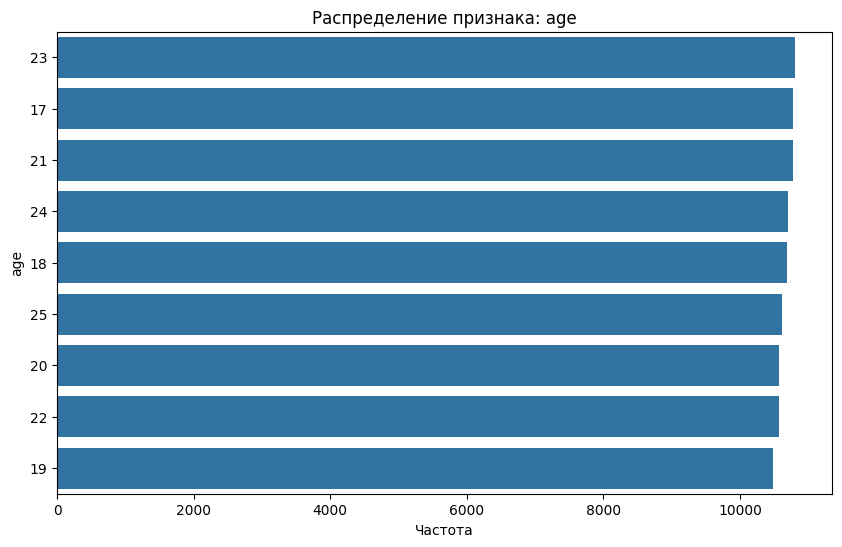

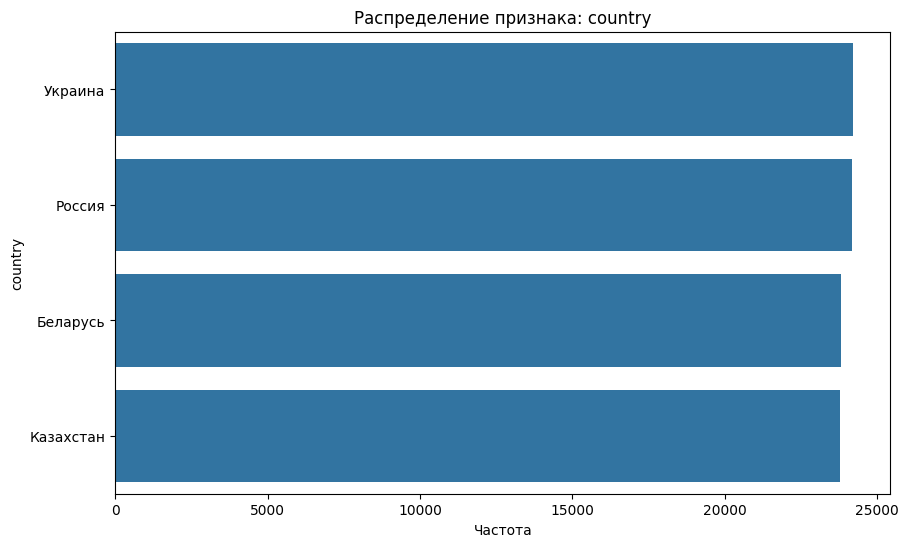

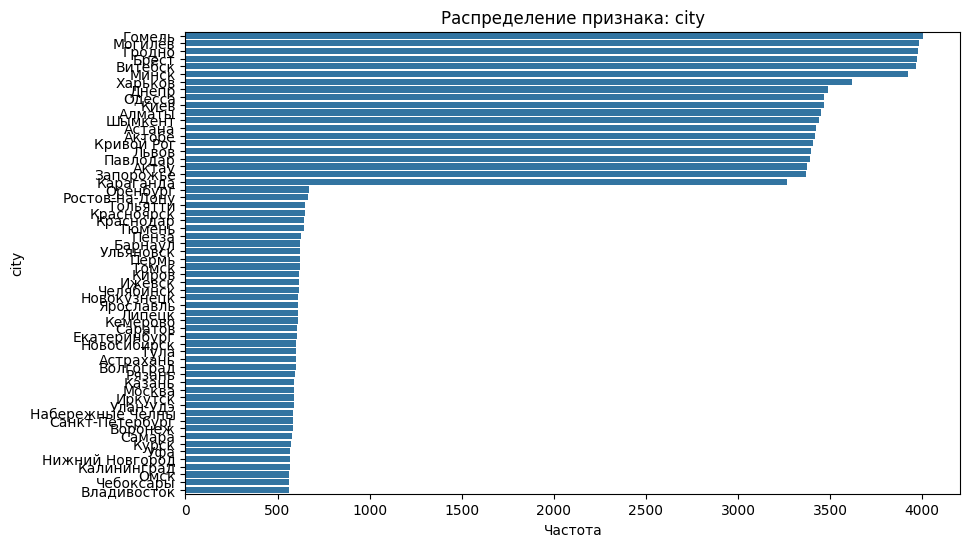

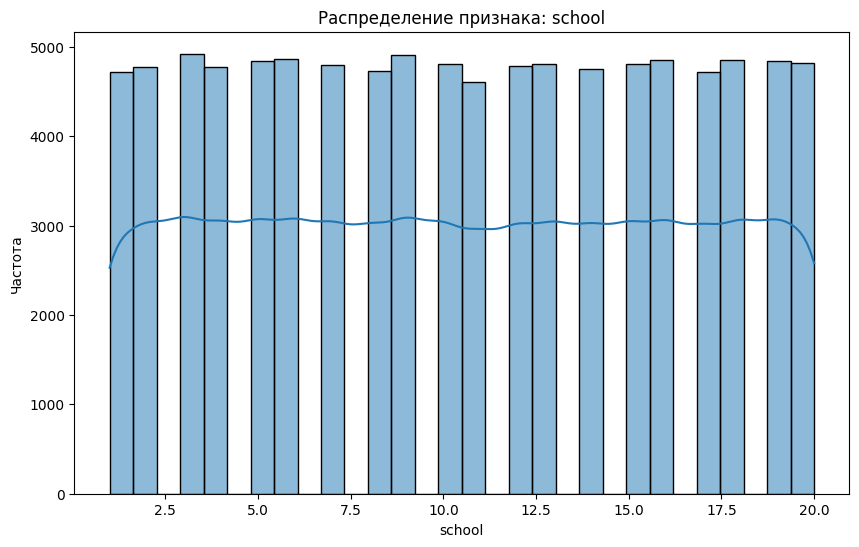

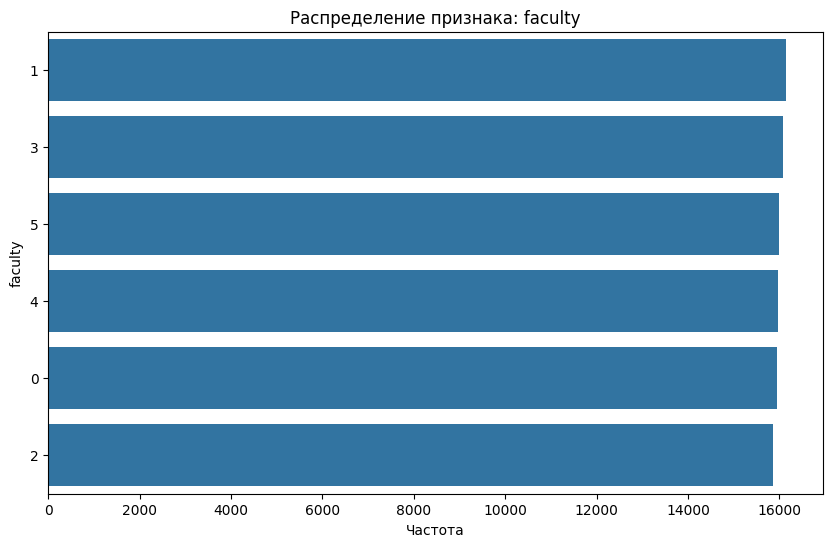

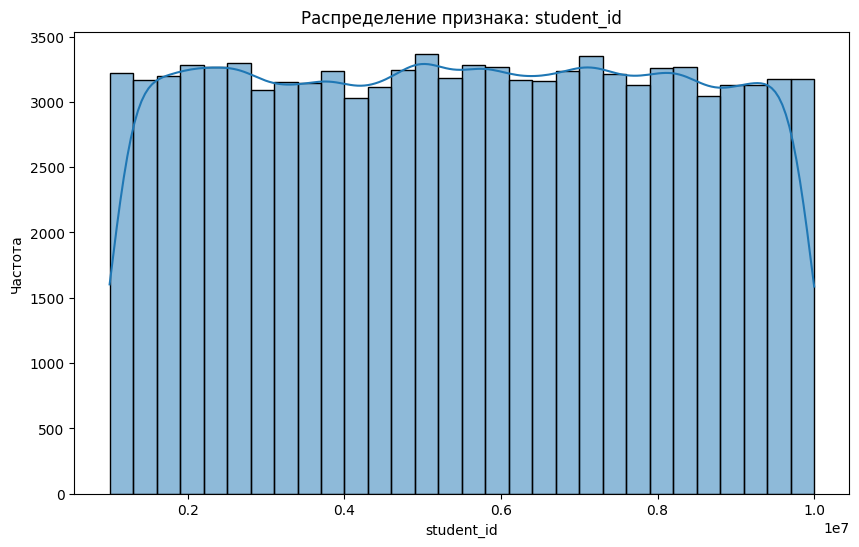

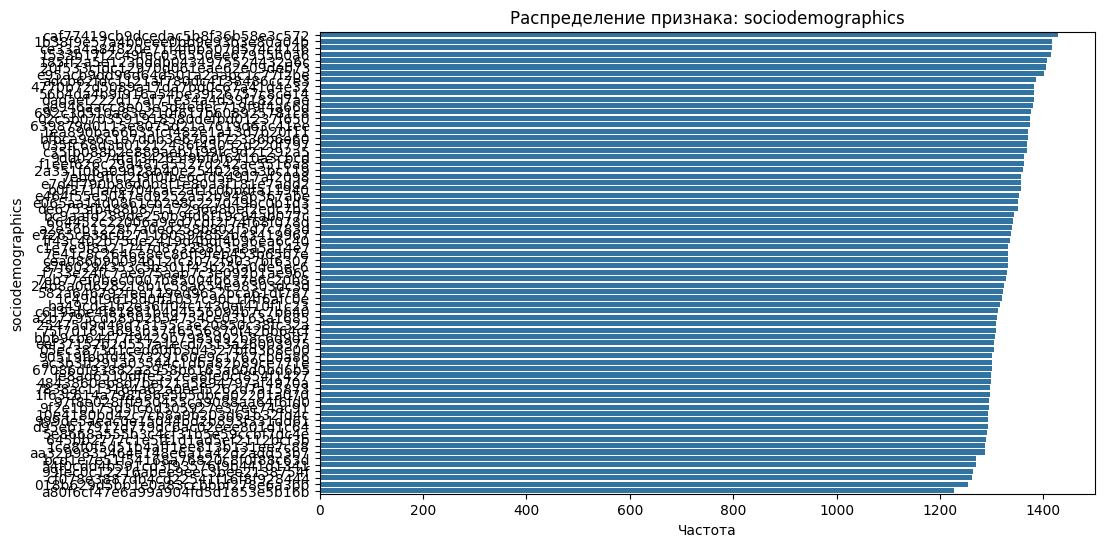

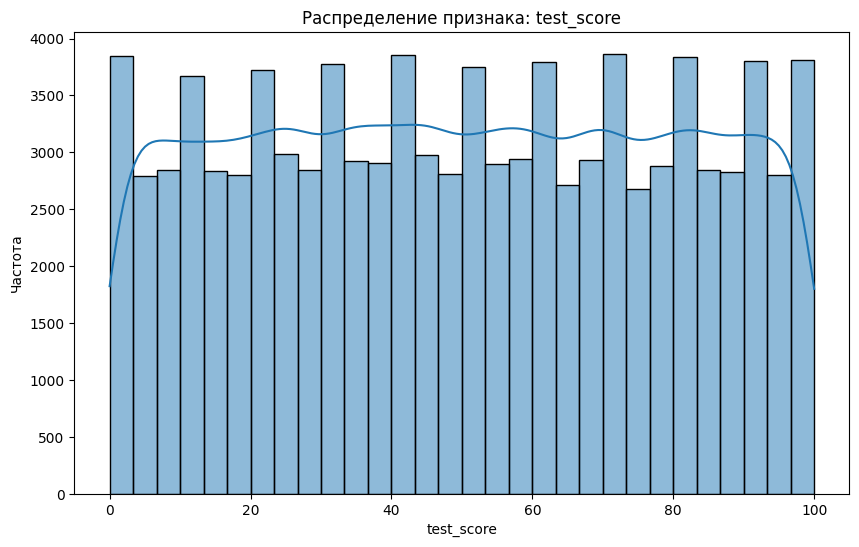

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x78a3bb057e20> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x78a3bb0542c0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plot_feature_distributions(df)

In [ ]:
def plot_feature_distributions_with_target(data, target):
    for column in data.columns:
        if column == target:
            continue  # Пропускаем целевую переменную

        plt.figure(figsize=(10, 6))

        if data[column].dtype == 'object' or len(data[column].unique()) < 20:  # Дискретные признаки
            # Построение графика частоты с учетом целевой переменной
            sns.countplot(y=column, data=data, hue=target, order=data[column].value_counts().index)
            plt.title(f'Распределение признака: {column} с учетом {target}')
            plt.xlabel('Частота')
            plt.ylabel(column)
        else:  # Непрерывные признаки
            # Построение гистограммы с учетом целевой переменной
            sns.histplot(data=data, x=column, hue=target, bins=30, kde=True, multiple='stack')
            plt.title(f'Распределение признака: {column} с учетом {target}')
            plt.xlabel(column)
            plt.ylabel('Частота')

        plt.legend(title=target)
        plt.show()

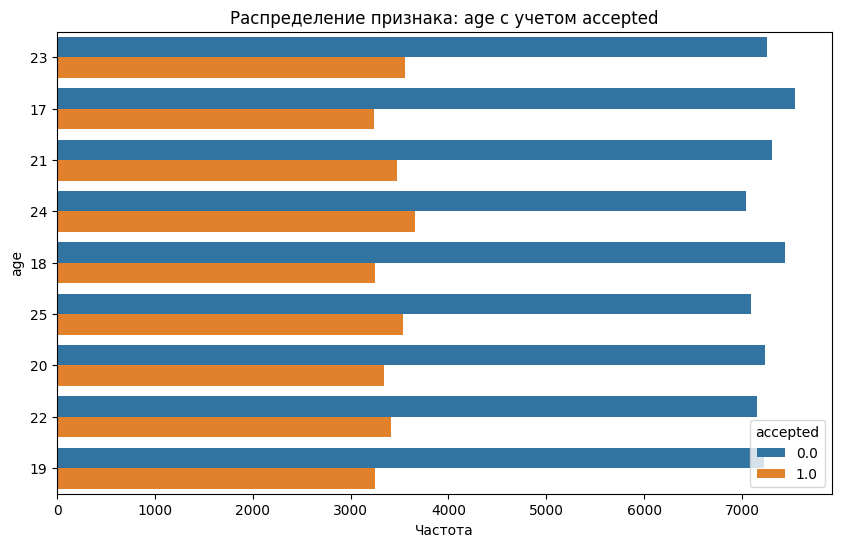

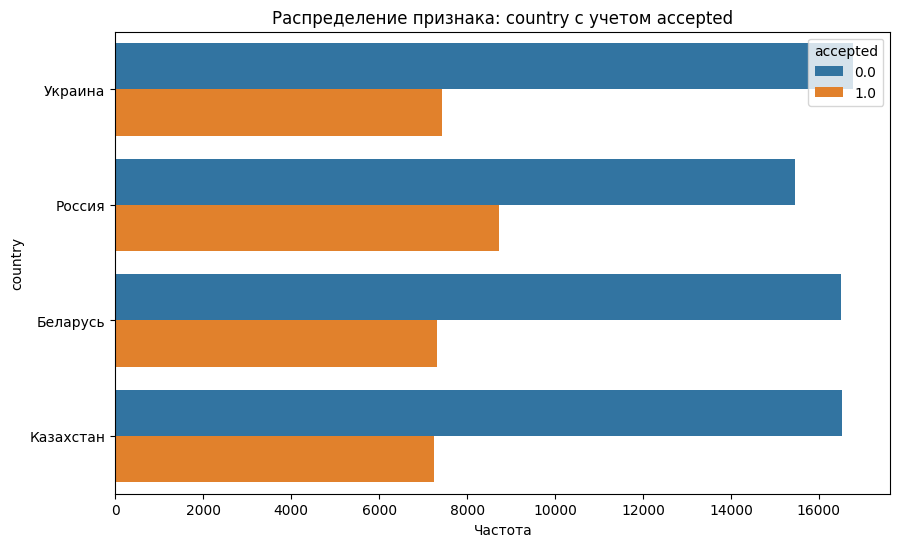

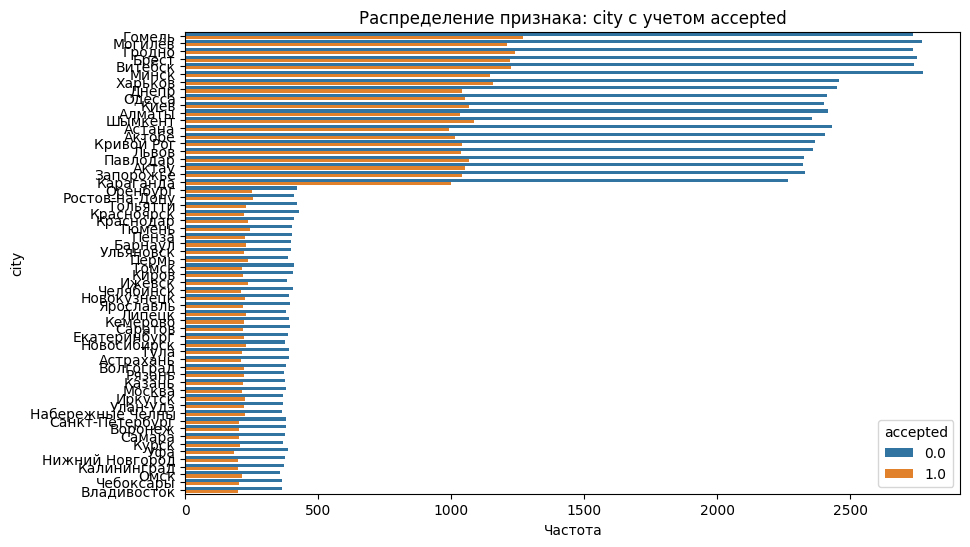

<ipython-input-17-ac61caae40b5>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


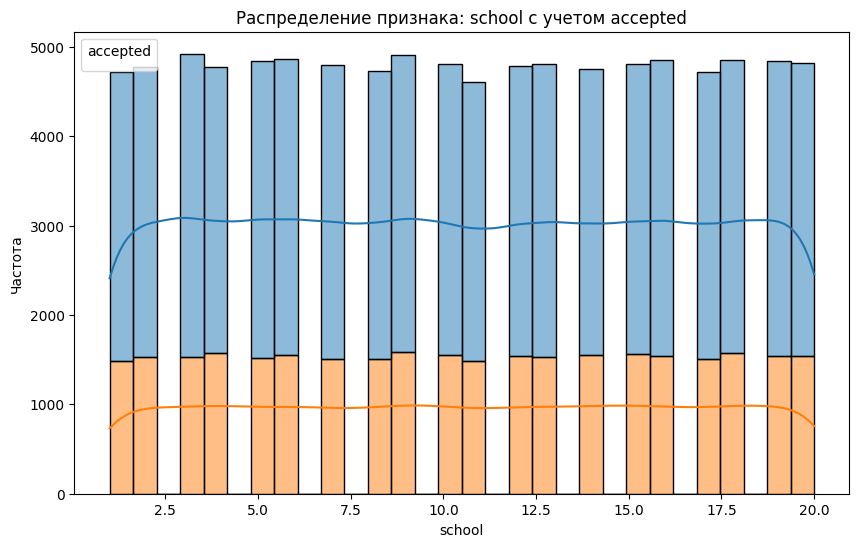

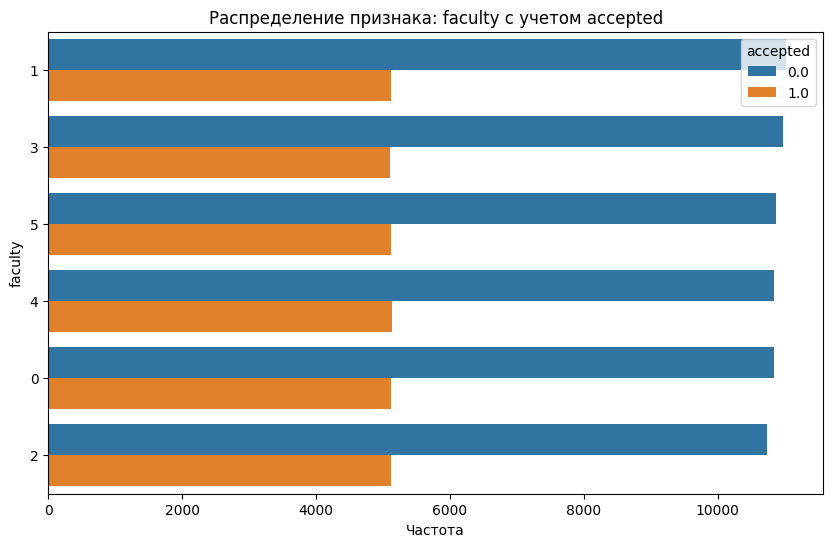

<ipython-input-17-ac61caae40b5>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


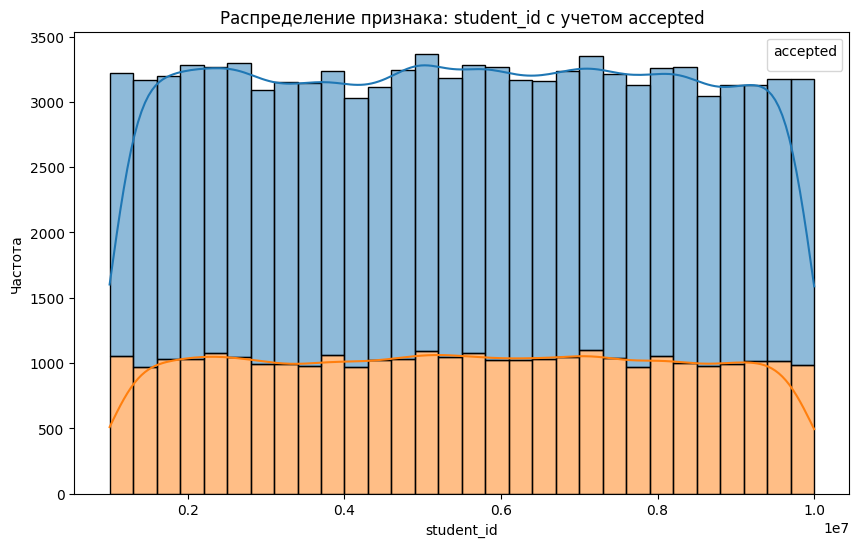

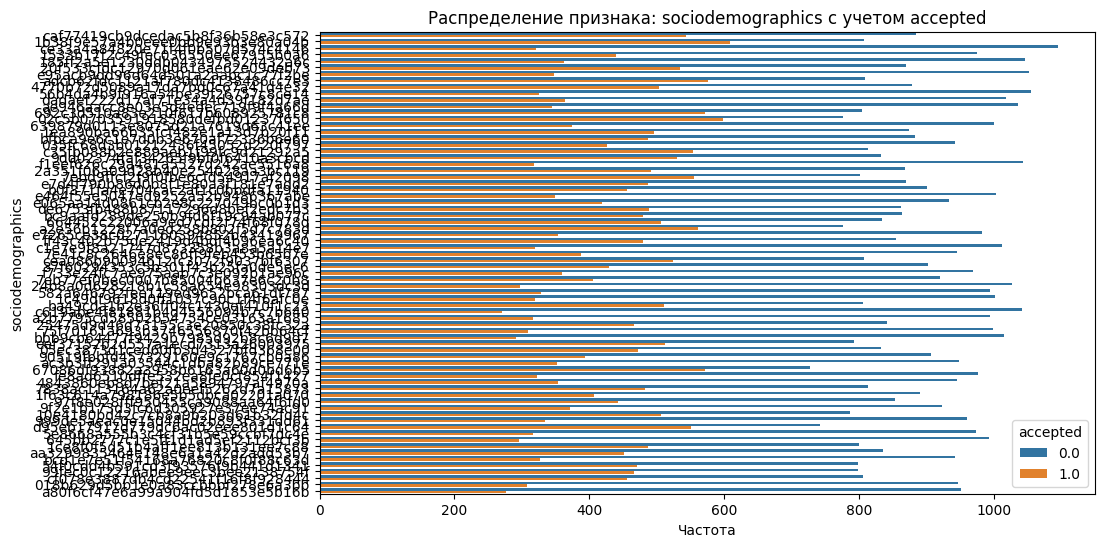

<ipython-input-17-ac61caae40b5>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


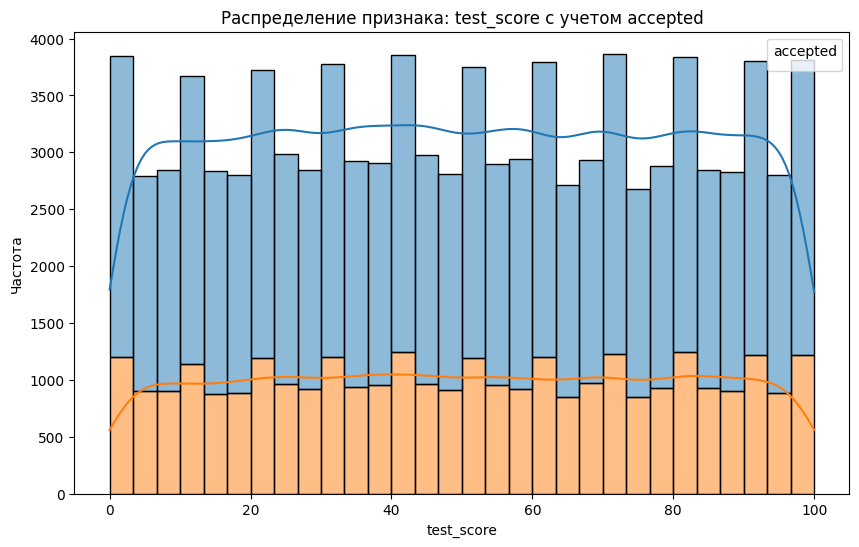

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x791af656be20> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x791af65682c0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plot_feature_distributions_with_target(df, 'accepted')

In [ ]:
from scipy import stats

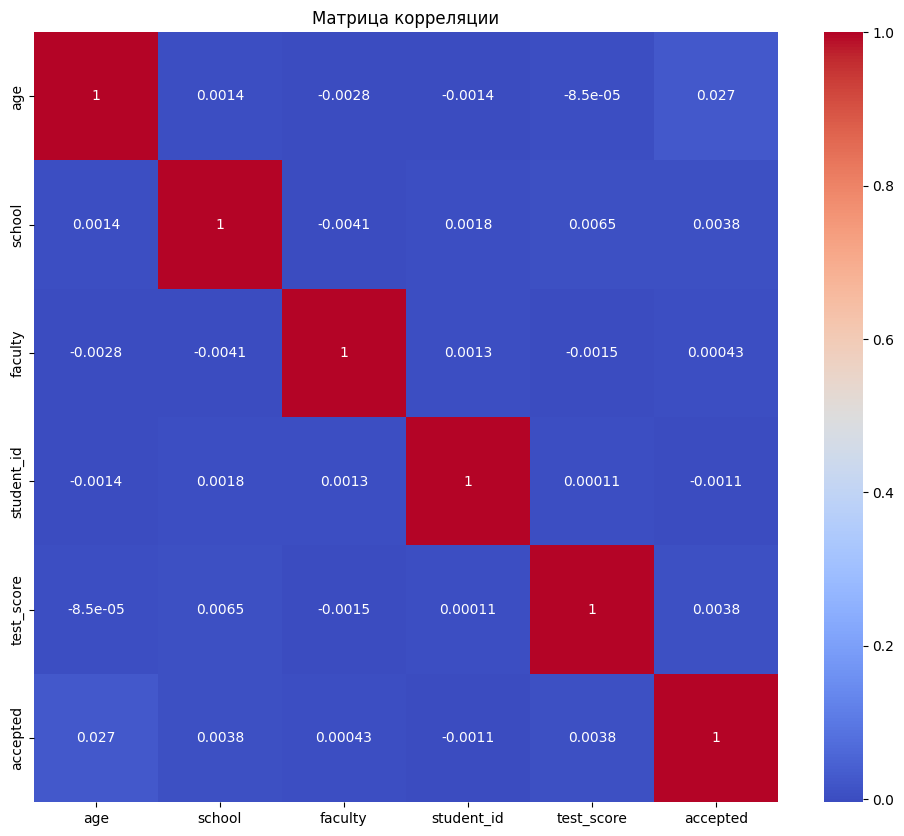

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']) # и другие числовые типы, если есть
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()


In [ ]:
df = train

In [ ]:
df

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted
0,24,Россия,Санкт-Петербург,9,0,7127004,1f63c614a798186e5b5dbca02201a070,21.0,06c4288fba116e49f49d82a16184fca6,0.0
1,21,Казахстан,Астана,5,0,6264436,99fec0c12216abee9eec3bee2138754f,29.0,45273a0d372f7f2747afc98bdc63c31a,1.0
2,17,Россия,Тула,3,0,9056805,f733e24fc7ae975aab7c3e092b1ae96c,89.0,773c820049150b6854691b5e7fdcd63f,0.0
3,20,Украина,Киев,1,0,8857612,a2b7795cd58502654754ce03163a1685,2.0,d07f757f1b51f8b9189a84298b142794,0.0
4,19,Россия,Пермь,8,0,6422527,90519fbbfd457329160e9c1767cb0a86,23.0,269f19b2ef9f46af5012931bfd4acf22,0.0
...,...,...,...,...,...,...,...,...,...,...
95995,21,Россия,Улан-Удэ,5,5,2019496,e065aa14d0861cb2e8c227049bc0b1d3,73.0,4c33d89befc11bea800221a9d8719549,1.0
95996,18,Казахстан,Шымкент,9,5,1202270,de6753fb488b87117296d8bef2edc7b3,91.0,b76e187984d8b80264b4c97fac124f84,0.0
95997,18,Россия,Владивосток,14,5,4114792,7ebd9ffcf2f9f0fbe6cfd54917af2098,31.0,750e34ebbf17be247c9184149109cbdd,1.0
95998,20,Украина,Запорожье,2,5,5024696,a2b7795cd58502654754ce03163a1685,45.0,0a17ffcb17a2ffd2eb185ac793ed444e,1.0


In [ ]:
df = train

In [ ]:
cat_features = ['country', 'city', 'application_id', 'sociodemographics', 'application_id'] # укажите все категориальные столбцы

for col in cat_features:
  df[col] = df[col].astype('category')

X = df.drop(columns=['accepted'])
y = df['accepted']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 1400),
        'depth': trial.suggest_int('depth', 4, 11),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),
        'verbose': 1,
        'eval_metric': 'AUC',
        'random_seed': 42,
        'use_best_model': True,
        'devices':'cuda',
        'loss_function':'Logloss',
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100)
        }

    train_pool = Pool(X_train, y_train, cat_features=cat_features)
    valid_pool = Pool(X_valid, y_valid, cat_features=cat_features)

    model = CatBoostClassifier(**params)
    model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=25)

    preds = model.predict(X_valid)
    roc = roc_auc_score(y_valid, preds)

    return roc

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=65)

best_trial = study.best_trial
print(f"Лучшие параметры: {best_trial}")

[I 2025-01-22 12:38:28,716] A new study created in memory with name: no-name-5470e7bf-dd63-4614-9181-e0a31e4b390b
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 130ms	remaining: 42.4s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 201ms	remaining: 32.6s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 259ms	remaining: 27.9s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 364ms	remaining: 29.3s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 454ms	remaining: 29.2s
5:	test: 0.5849027	best: 0.5853225 (2)	total: 492ms	remaining: 26.2s
6:	test: 0.5849235	best: 0.5853225 (2)	total: 597ms	remaining: 27.2s
7:	test: 0.8256780	best: 0.8256780 (7)	total: 740ms	remaining: 29.4s
8:	test: 0.8260879	best: 0.8260879 (8)	total: 819ms	remaining: 28.9s
9:	test: 0.8261773	best: 0.8261773 (9)	total: 886ms	remaining: 28s
10:	test: 0.8265008	best: 0.8265008 (10)	total: 966ms	remaining: 27.7s
11:	test: 0.8260586	best: 0.8265008 (10)	total: 1.04s	remaining: 27.3s
12:	test: 0.8265840	best: 0.8265840 (12)	total: 1.15s	remaining: 27.7s
13:	test: 0.8266381	best: 0.8266381 (13)	total: 1.22s	remaining: 27.1s
14:	test: 0.8265743	best: 0.

[I 2025-01-22 12:38:34,337] Trial 0 finished with value: 0.7084050770347379 and parameters: {'iterations': 326, 'depth': 7, 'learning_rate': 0.0003968638619791555, 'l2_leaf_reg': 1.588577382791728, 'min_data_in_leaf': 93}. Best is trial 0 with value: 0.7084050770347379.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 57.4ms	remaining: 13.7s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 117ms	remaining: 14s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 176ms	remaining: 13.9s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 305ms	remaining: 18s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 387ms	remaining: 18.2s
5:	test: 0.5849027	best: 0.5853225 (2)	total: 434ms	remaining: 16.9s
6:	test: 0.5849027	best: 0.5853225 (2)	total: 480ms	remaining: 16s
7:	test: 0.5852833	best: 0.5853225 (2)	total: 567ms	remaining: 16.4s
8:	test: 0.5862425	best: 0.5862425 (8)	total: 633ms	remaining: 16.3s
9:	test: 0.5859347	best: 0.5862425 (8)	total: 712ms	remaining: 16.4s
10:	test: 0.5867898	best: 0.5867898 (10)	total: 753ms	remaining: 15.7s
11:	test: 0.5868747	best: 0.5868747 (11)	total: 881ms	remaining: 16.7s
12:	test: 0.5871533	best: 0.5871533 (12)	total: 1.01s	remaining: 17.6s
13:	test: 0.5871533	best: 0.5871533 (12)	total: 1.05s	remaining: 17s
14:	test: 0.5873147	best: 0.58731

[I 2025-01-22 12:38:41,440] Trial 1 finished with value: 0.5 and parameters: {'iterations': 240, 'depth': 10, 'learning_rate': 0.00019080272109720515, 'l2_leaf_reg': 0.001883695527320984, 'min_data_in_leaf': 57}. Best is trial 0 with value: 0.7084050770347379.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 61.2ms	remaining: 21.4s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 115ms	remaining: 20s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 171ms	remaining: 19.9s
3:	test: 0.5853225	best: 0.5853225 (2)	total: 235ms	remaining: 20.4s
4:	test: 0.5853225	best: 0.5853225 (2)	total: 287ms	remaining: 19.8s
5:	test: 0.5853225	best: 0.5853225 (2)	total: 346ms	remaining: 19.9s
6:	test: 0.8261086	best: 0.8261086 (6)	total: 414ms	remaining: 20.4s
7:	test: 0.8283613	best: 0.8283613 (7)	total: 513ms	remaining: 22s
8:	test: 0.8285269	best: 0.8285269 (8)	total: 599ms	remaining: 22.8s
9:	test: 0.8285269	best: 0.8285269 (8)	total: 660ms	remaining: 22.5s
10:	test: 0.8281510	best: 0.8285269 (8)	total: 742ms	remaining: 22.9s
11:	test: 0.8281714	best: 0.8285269 (8)	total: 793ms	remaining: 22.4s
12:	test: 0.8281714	best: 0.8285269 (8)	total: 850ms	remaining: 22.1s
13:	test: 0.8281126	best: 0.8285269 (8)	total: 932ms	remaining: 22.4s
14:	test: 0.8281845	best: 0.82852

[I 2025-01-22 12:38:44,380] Trial 2 finished with value: 0.7084050770347379 and parameters: {'iterations': 351, 'depth': 7, 'learning_rate': 0.008594147010668561, 'l2_leaf_reg': 4.1357169989528915, 'min_data_in_leaf': 1}. Best is trial 0 with value: 0.7084050770347379.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 25.8ms	remaining: 5.08s
1:	test: 0.7784551	best: 0.7784551 (1)	total: 77.5ms	remaining: 7.6s
2:	test: 0.8221711	best: 0.8221711 (2)	total: 99.9ms	remaining: 6.49s
3:	test: 0.8262889	best: 0.8262889 (3)	total: 127ms	remaining: 6.16s
4:	test: 0.8263462	best: 0.8263462 (4)	total: 154ms	remaining: 5.93s
5:	test: 0.8261965	best: 0.8263462 (4)	total: 179ms	remaining: 5.74s
6:	test: 0.8262044	best: 0.8263462 (4)	total: 203ms	remaining: 5.53s
7:	test: 0.8263000	best: 0.8263462 (4)	total: 232ms	remaining: 5.5s
8:	test: 0.8262922	best: 0.8263462 (4)	total: 259ms	remaining: 5.43s
9:	test: 0.8263323	best: 0.8263462 (4)	total: 285ms	remaining: 5.37s
10:	test: 0.8263341	best: 0.8263462 (4)	total: 309ms	remaining: 5.25s
11:	test: 0.8263341	best: 0.8263462 (4)	total: 328ms	remaining: 5.09s
12:	test: 0.8263341	best: 0.8263462 (4)	total: 351ms	remaining: 4.99s
13:	test: 0.8263526	best: 0.8263526 (13)	total: 378ms	remaining: 4.97s
14:	test: 0.8273278	best: 0.

[I 2025-01-22 12:38:47,054] Trial 3 finished with value: 0.7084050770347379 and parameters: {'iterations': 198, 'depth': 5, 'learning_rate': 0.07810474710038466, 'l2_leaf_reg': 1.2669232286855794, 'min_data_in_leaf': 69}. Best is trial 0 with value: 0.7084050770347379.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 54.4ms	remaining: 28s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 132ms	remaining: 33.8s
2:	test: 0.5849408	best: 0.5849408 (2)	total: 218ms	remaining: 37.2s
3:	test: 0.5849408	best: 0.5849408 (2)	total: 271ms	remaining: 34.7s
4:	test: 0.5849408	best: 0.5849408 (2)	total: 321ms	remaining: 32.8s
5:	test: 0.5837868	best: 0.5849408 (2)	total: 529ms	remaining: 45s
6:	test: 0.5837868	best: 0.5849408 (2)	total: 569ms	remaining: 41.3s
7:	test: 0.5836763	best: 0.5849408 (2)	total: 704ms	remaining: 44.7s
8:	test: 0.5835510	best: 0.5849408 (2)	total: 779ms	remaining: 43.9s
9:	test: 0.5841737	best: 0.5849408 (2)	total: 986ms	remaining: 49.9s
10:	test: 0.5841804	best: 0.5849408 (2)	total: 1.05s	remaining: 48.3s
11:	test: 0.5857694	best: 0.5857694 (11)	total: 1.31s	remaining: 55.1s
12:	test: 0.5859182	best: 0.5859182 (12)	total: 1.39s	remaining: 53.7s
13:	test: 0.5869494	best: 0.5869494 (13)	total: 1.59s	remaining: 57.1s
14:	test: 0.5874192	best: 0.58

[I 2025-01-22 12:38:55,167] Trial 4 finished with value: 0.708730800323363 and parameters: {'iterations': 516, 'depth': 10, 'learning_rate': 0.0010428095345438302, 'l2_leaf_reg': 14.436004884020207, 'min_data_in_leaf': 15}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.8ms	remaining: 31.9s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 109ms	remaining: 31.2s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 167ms	remaining: 31.7s
3:	test: 0.5853225	best: 0.5853225 (2)	total: 251ms	remaining: 35.7s
4:	test: 0.5855395	best: 0.5855395 (4)	total: 351ms	remaining: 39.8s
5:	test: 0.5855395	best: 0.5855395 (4)	total: 407ms	remaining: 38.5s
6:	test: 0.5855395	best: 0.5855395 (4)	total: 445ms	remaining: 36s
7:	test: 0.5855395	best: 0.5855395 (4)	total: 505ms	remaining: 35.7s
8:	test: 0.5855395	best: 0.5855395 (4)	total: 550ms	remaining: 34.4s
9:	test: 0.5855395	best: 0.5855395 (4)	total: 593ms	remaining: 33.4s
10:	test: 0.8265554	best: 0.8265554 (10)	total: 673ms	remaining: 34.4s
11:	test: 0.8265554	best: 0.8265554 (10)	total: 739ms	remaining: 34.5s
12:	test: 0.8265554	best: 0.8265554 (10)	total: 790ms	remaining: 34s
13:	test: 0.8266975	best: 0.8266975 (13)	total: 872ms	remaining: 34.8s
14:	test: 0.8282141	best: 0.8

[I 2025-01-22 12:38:59,114] Trial 5 finished with value: 0.708730800323363 and parameters: {'iterations': 573, 'depth': 5, 'learning_rate': 0.0012037025220825392, 'l2_leaf_reg': 0.0008539998193826768, 'min_data_in_leaf': 72}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.4ms	remaining: 16.4s
1:	test: 0.8168502	best: 0.8168502 (1)	total: 131ms	remaining: 19.3s
2:	test: 0.8220759	best: 0.8220759 (2)	total: 206ms	remaining: 20.2s
3:	test: 0.8260828	best: 0.8260828 (3)	total: 291ms	remaining: 21.4s
4:	test: 0.8260840	best: 0.8260840 (4)	total: 345ms	remaining: 20.2s
5:	test: 0.8260840	best: 0.8260840 (4)	total: 404ms	remaining: 19.7s
6:	test: 0.8260840	best: 0.8260840 (4)	total: 450ms	remaining: 18.7s
7:	test: 0.8269929	best: 0.8269929 (7)	total: 518ms	remaining: 18.8s
8:	test: 0.8270002	best: 0.8270002 (8)	total: 586ms	remaining: 18.8s
9:	test: 0.8271478	best: 0.8271478 (9)	total: 653ms	remaining: 18.8s
10:	test: 0.8271377	best: 0.8271478 (9)	total: 711ms	remaining: 18.6s
11:	test: 0.7638172	best: 0.8271478 (9)	total: 769ms	remaining: 18.3s
12:	test: 0.7638290	best: 0.8271478 (9)	total: 826ms	remaining: 18.1s
13:	test: 0.7639303	best: 0.8271478 (9)	total: 875ms	remaining: 17.7s
14:	test: 0.7639051	best: 0.8

[I 2025-01-22 12:39:01,800] Trial 6 finished with value: 0.7083362552567447 and parameters: {'iterations': 298, 'depth': 4, 'learning_rate': 0.09637394746207374, 'l2_leaf_reg': 0.0004458711838418756, 'min_data_in_leaf': 98}. Best is trial 4 with value: 0.708730800323363.


34:	test: 0.7624965	best: 0.8271478 (9)	total: 2.08s	remaining: 15.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.8271478497
bestIteration = 9

Shrink model to first 10 iterations.


<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.9ms	remaining: 1m 3s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 114ms	remaining: 1m 5s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 171ms	remaining: 1m 4s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 271ms	remaining: 1m 17s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 350ms	remaining: 1m 19s
5:	test: 0.5855274	best: 0.5855274 (5)	total: 415ms	remaining: 1m 18s
6:	test: 0.5855274	best: 0.5855274 (5)	total: 459ms	remaining: 1m 14s
7:	test: 0.5855274	best: 0.5855274 (5)	total: 504ms	remaining: 1m 11s
8:	test: 0.5855274	best: 0.5855274 (5)	total: 542ms	remaining: 1m 8s
9:	test: 0.5855274	best: 0.5855274 (5)	total: 605ms	remaining: 1m 8s
10:	test: 0.5853906	best: 0.5855274 (5)	total: 672ms	remaining: 1m 9s
11:	test: 0.5853906	best: 0.5855274 (5)	total: 712ms	remaining: 1m 7s
12:	test: 0.5871005	best: 0.5871005 (12)	total: 812ms	remaining: 1m 10s
13:	test: 0.5871005	best: 0.5871005 (12)	total: 849ms	remaining: 1m 8s
14:	test: 0.5871715	b

[I 2025-01-22 12:39:06,951] Trial 7 finished with value: 0.7084074373484236 and parameters: {'iterations': 1142, 'depth': 8, 'learning_rate': 0.0025477512578594786, 'l2_leaf_reg': 0.2633265101693016, 'min_data_in_leaf': 70}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 101ms	remaining: 2m
1:	test: 0.5835934	best: 0.5835934 (1)	total: 186ms	remaining: 1m 50s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 303ms	remaining: 2m
3:	test: 0.5852093	best: 0.5853225 (2)	total: 514ms	remaining: 2m 32s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 639ms	remaining: 2m 31s
5:	test: 0.5855274	best: 0.5855274 (5)	total: 703ms	remaining: 2m 19s
6:	test: 0.5855274	best: 0.5855274 (5)	total: 755ms	remaining: 2m 7s
7:	test: 0.5858532	best: 0.5858532 (7)	total: 880ms	remaining: 2m 10s
8:	test: 0.5858795	best: 0.5858795 (8)	total: 954ms	remaining: 2m 5s
9:	test: 0.5858794	best: 0.5858795 (8)	total: 997ms	remaining: 1m 57s
10:	test: 0.5855572	best: 0.5858795 (8)	total: 1.12s	remaining: 2m
11:	test: 0.5853671	best: 0.5858795 (8)	total: 1.19s	remaining: 1m 56s
12:	test: 0.5853671	best: 0.5858795 (8)	total: 1.23s	remaining: 1m 51s
13:	test: 0.5856206	best: 0.5858795 (8)	total: 1.3s	remaining: 1m 49s
14:	test: 0.5856206	best: 0.585

[I 2025-01-22 12:39:17,395] Trial 8 finished with value: 0.708730800323363 and parameters: {'iterations': 1192, 'depth': 9, 'learning_rate': 0.0005167190124509874, 'l2_leaf_reg': 0.22404059577802152, 'min_data_in_leaf': 60}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 66.7ms	remaining: 1m 24s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 121ms	remaining: 1m 16s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 183ms	remaining: 1m 16s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 297ms	remaining: 1m 33s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 394ms	remaining: 1m 39s
5:	test: 0.5849027	best: 0.5853225 (2)	total: 476ms	remaining: 1m 39s
6:	test: 0.5849027	best: 0.5853225 (2)	total: 553ms	remaining: 1m 39s
7:	test: 0.8272053	best: 0.8272053 (7)	total: 789ms	remaining: 2m 3s
8:	test: 0.8280839	best: 0.8280839 (8)	total: 1.16s	remaining: 2m 42s
9:	test: 0.8280839	best: 0.8280839 (8)	total: 1.27s	remaining: 2m 39s
10:	test: 0.8280839	best: 0.8280839 (8)	total: 1.58s	remaining: 2m 59s
11:	test: 0.8280721	best: 0.8280839 (8)	total: 1.72s	remaining: 2m 59s
12:	test: 0.8280721	best: 0.8280839 (8)	total: 1.82s	remaining: 2m 55s
13:	test: 0.8280721	best: 0.8280839 (8)	total: 1.95s	remaining: 2m 53s
14:	test: 0.8281

[I 2025-01-22 12:39:25,517] Trial 9 finished with value: 0.708730800323363 and parameters: {'iterations': 1264, 'depth': 10, 'learning_rate': 0.0060175090791165925, 'l2_leaf_reg': 0.002939489842961361, 'min_data_in_leaf': 31}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.6ms	remaining: 44.4s
1:	test: 0.5853225	best: 0.5853225 (1)	total: 160ms	remaining: 1m 3s
2:	test: 0.5853225	best: 0.5853225 (1)	total: 204ms	remaining: 54.2s
3:	test: 0.5853225	best: 0.5853225 (1)	total: 268ms	remaining: 53.2s
4:	test: 0.8268730	best: 0.8268730 (4)	total: 376ms	remaining: 59.7s
5:	test: 0.8268730	best: 0.8268730 (4)	total: 449ms	remaining: 59.4s
6:	test: 0.8268730	best: 0.8268730 (4)	total: 510ms	remaining: 57.7s
7:	test: 0.8268730	best: 0.8268730 (4)	total: 575ms	remaining: 56.8s
8:	test: 0.8268730	best: 0.8268730 (4)	total: 631ms	remaining: 55.4s
9:	test: 0.8267330	best: 0.8268730 (4)	total: 818ms	remaining: 1m 4s
10:	test: 0.8267440	best: 0.8268730 (4)	total: 950ms	remaining: 1m 8s
11:	test: 0.8267440	best: 0.8268730 (4)	total: 1.02s	remaining: 1m 6s
12:	test: 0.8267440	best: 0.8268730 (4)	total: 1.08s	remaining: 1m 5s
13:	test: 0.8267440	best: 0.8268730 (4)	total: 1.14s	remaining: 1m 3s
14:	test: 0.8280905	best: 0.8

[I 2025-01-22 12:39:32,593] Trial 10 finished with value: 0.708730800323363 and parameters: {'iterations': 799, 'depth': 11, 'learning_rate': 0.018988953028901526, 'l2_leaf_reg': 61.83772092789688, 'min_data_in_leaf': 23}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 113ms	remaining: 1m 14s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 208ms	remaining: 1m 8s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 318ms	remaining: 1m 9s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 501ms	remaining: 1m 22s
4:	test: 0.5849571	best: 0.5853225 (2)	total: 633ms	remaining: 1m 22s
5:	test: 0.5852235	best: 0.5853225 (2)	total: 775ms	remaining: 1m 24s
6:	test: 0.5852235	best: 0.5853225 (2)	total: 889ms	remaining: 1m 22s
7:	test: 0.5866185	best: 0.5866185 (7)	total: 1.06s	remaining: 1m 26s
8:	test: 0.5862261	best: 0.5866185 (7)	total: 1.16s	remaining: 1m 24s
9:	test: 0.5864448	best: 0.5866185 (7)	total: 1.37s	remaining: 1m 29s
10:	test: 0.5864865	best: 0.5866185 (7)	total: 1.53s	remaining: 1m 30s
11:	test: 0.5863403	best: 0.5866185 (7)	total: 1.67s	remaining: 1m 29s
12:	test: 0.5864179	best: 0.5866185 (7)	total: 1.76s	remaining: 1m 27s
13:	test: 0.5863548	best: 0.5866185 (7)	total: 1.96s	remaining: 1m 30s
14:	test: 0.586878

[I 2025-01-22 12:39:40,237] Trial 11 finished with value: 0.708730800323363 and parameters: {'iterations': 659, 'depth': 6, 'learning_rate': 0.001254051528471667, 'l2_leaf_reg': 2.0968358395485015e-05, 'min_data_in_leaf': 37}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 62.6ms	remaining: 40.1s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 124ms	remaining: 39.7s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 182ms	remaining: 38.8s
3:	test: 0.5853225	best: 0.5853225 (2)	total: 248ms	remaining: 39.5s
4:	test: 0.5853225	best: 0.5853225 (2)	total: 302ms	remaining: 38.5s
5:	test: 0.5853225	best: 0.5853225 (2)	total: 353ms	remaining: 37.5s
6:	test: 0.5853180	best: 0.5853225 (2)	total: 406ms	remaining: 36.8s
7:	test: 0.5864320	best: 0.5864320 (7)	total: 471ms	remaining: 37.3s
8:	test: 0.5864320	best: 0.5864320 (7)	total: 535ms	remaining: 37.6s
9:	test: 0.5856247	best: 0.5864320 (7)	total: 592ms	remaining: 37.4s
10:	test: 0.5849647	best: 0.5864320 (7)	total: 651ms	remaining: 37.3s
11:	test: 0.5849647	best: 0.5864320 (7)	total: 689ms	remaining: 36.2s
12:	test: 0.5853661	best: 0.5864320 (7)	total: 757ms	remaining: 36.6s
13:	test: 0.5853661	best: 0.5864320 (7)	total: 800ms	remaining: 35.9s
14:	test: 0.5853661	best: 0.5

[I 2025-01-22 12:39:44,272] Trial 12 finished with value: 0.6317704122877931 and parameters: {'iterations': 642, 'depth': 4, 'learning_rate': 0.0010247165726977113, 'l2_leaf_reg': 0.019860506715653495, 'min_data_in_leaf': 3}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 58.3ms	remaining: 54.2s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 110ms	remaining: 51.2s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 193ms	remaining: 59.6s
3:	test: 0.5848498	best: 0.5853225 (2)	total: 289ms	remaining: 1m 7s
4:	test: 0.5851773	best: 0.5853225 (2)	total: 380ms	remaining: 1m 10s
5:	test: 0.5851773	best: 0.5853225 (2)	total: 458ms	remaining: 1m 10s
6:	test: 0.5851773	best: 0.5853225 (2)	total: 497ms	remaining: 1m 5s
7:	test: 0.5851773	best: 0.5853225 (2)	total: 538ms	remaining: 1m 2s
8:	test: 0.5830194	best: 0.5853225 (2)	total: 619ms	remaining: 1m 3s
9:	test: 0.5830194	best: 0.5853225 (2)	total: 697ms	remaining: 1m 4s
10:	test: 0.5834183	best: 0.5853225 (2)	total: 754ms	remaining: 1m 3s
11:	test: 0.5834474	best: 0.5853225 (2)	total: 845ms	remaining: 1m 4s
12:	test: 0.5840032	best: 0.5853225 (2)	total: 907ms	remaining: 1m 3s
13:	test: 0.5840032	best: 0.5853225 (2)	total: 960ms	remaining: 1m 2s
14:	test: 0.5840032	best: 0

[I 2025-01-22 12:39:59,567] Trial 13 finished with value: 0.708730800323363 and parameters: {'iterations': 930, 'depth': 6, 'learning_rate': 0.00011489362165277831, 'l2_leaf_reg': 80.58837916169408, 'min_data_in_leaf': 81}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 58.9ms	remaining: 29.4s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 150ms	remaining: 37.3s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 238ms	remaining: 39.4s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 450ms	remaining: 55.8s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 658ms	remaining: 1m 5s
5:	test: 0.5855274	best: 0.5855274 (5)	total: 800ms	remaining: 1m 5s
6:	test: 0.5855274	best: 0.5855274 (5)	total: 971ms	remaining: 1m 8s
7:	test: 0.5861697	best: 0.5861697 (7)	total: 1.18s	remaining: 1m 12s
8:	test: 0.5865416	best: 0.5865416 (8)	total: 1.47s	remaining: 1m 20s
9:	test: 0.5865416	best: 0.5865416 (8)	total: 1.54s	remaining: 1m 15s
10:	test: 0.5862793	best: 0.5865416 (8)	total: 1.64s	remaining: 1m 12s
11:	test: 0.5862793	best: 0.5865416 (8)	total: 1.8s	remaining: 1m 13s
12:	test: 0.5862793	best: 0.5865416 (8)	total: 1.91s	remaining: 1m 11s
13:	test: 0.5881301	best: 0.5881301 (13)	total: 2.02s	remaining: 1m 10s
14:	test: 0.5881913	be

[I 2025-01-22 12:40:07,702] Trial 14 finished with value: 0.708730800323363 and parameters: {'iterations': 500, 'depth': 8, 'learning_rate': 0.002148077837462045, 'l2_leaf_reg': 3.43311923503589e-05, 'min_data_in_leaf': 44}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 26.4ms	remaining: 1.29s
1:	test: 0.5834293	best: 0.5834293 (1)	total: 63.7ms	remaining: 1.53s
2:	test: 0.5842438	best: 0.5842438 (2)	total: 96.5ms	remaining: 1.51s
3:	test: 0.5857183	best: 0.5857183 (3)	total: 142ms	remaining: 1.63s
4:	test: 0.5848030	best: 0.5857183 (3)	total: 189ms	remaining: 1.71s
5:	test: 0.5848030	best: 0.5857183 (3)	total: 207ms	remaining: 1.52s
6:	test: 0.5843716	best: 0.5857183 (3)	total: 250ms	remaining: 1.53s
7:	test: 0.5847785	best: 0.5857183 (3)	total: 276ms	remaining: 1.45s
8:	test: 0.5858351	best: 0.5858351 (8)	total: 308ms	remaining: 1.4s
9:	test: 0.5858351	best: 0.5858351 (8)	total: 324ms	remaining: 1.3s
10:	test: 0.5858351	best: 0.5858351 (8)	total: 341ms	remaining: 1.21s
11:	test: 0.5858351	best: 0.5858351 (8)	total: 359ms	remaining: 1.14s
12:	test: 0.5859172	best: 0.5859172 (12)	total: 382ms	remaining: 1.08s
13:	test: 0.5857782	best: 0.5859172 (12)	total: 405ms	remaining: 1.04s
14:	test: 0.5860649	best: 0

[I 2025-01-22 12:40:10,026] Trial 15 finished with value: 0.5 and parameters: {'iterations': 50, 'depth': 9, 'learning_rate': 0.0004808766369507886, 'l2_leaf_reg': 0.00030386937176915074, 'min_data_in_leaf': 17}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 56.9ms	remaining: 53.8s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 113ms	remaining: 53.2s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 188ms	remaining: 59s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 303ms	remaining: 1m 11s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 387ms	remaining: 1m 12s
5:	test: 0.5855274	best: 0.5855274 (5)	total: 454ms	remaining: 1m 11s
6:	test: 0.8275058	best: 0.8275058 (6)	total: 524ms	remaining: 1m 10s
7:	test: 0.8275405	best: 0.8275405 (7)	total: 627ms	remaining: 1m 13s
8:	test: 0.8280793	best: 0.8280793 (8)	total: 756ms	remaining: 1m 18s
9:	test: 0.8280793	best: 0.8280793 (8)	total: 827ms	remaining: 1m 17s
10:	test: 0.8284590	best: 0.8284590 (10)	total: 892ms	remaining: 1m 15s
11:	test: 0.8285498	best: 0.8285498 (11)	total: 972ms	remaining: 1m 15s
12:	test: 0.8285498	best: 0.8285498 (11)	total: 1.03s	remaining: 1m 13s
13:	test: 0.8285498	best: 0.8285498 (11)	total: 1.09s	remaining: 1m 12s
14:	test: 0.8285

[I 2025-01-22 12:40:19,703] Trial 16 finished with value: 0.708730800323363 and parameters: {'iterations': 946, 'depth': 11, 'learning_rate': 0.00750021271454946, 'l2_leaf_reg': 0.02760834663974208, 'min_data_in_leaf': 81}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 56ms	remaining: 30.2s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 109ms	remaining: 29.4s
2:	test: 0.5818751	best: 0.5835934 (1)	total: 233ms	remaining: 41.8s
3:	test: 0.5818751	best: 0.5835934 (1)	total: 276ms	remaining: 37s
4:	test: 0.5818751	best: 0.5835934 (1)	total: 349ms	remaining: 37.3s
5:	test: 0.5836082	best: 0.5836082 (5)	total: 392ms	remaining: 34.9s
6:	test: 0.5835307	best: 0.5836082 (5)	total: 501ms	remaining: 38.1s
7:	test: 0.5839634	best: 0.5839634 (7)	total: 587ms	remaining: 39.1s
8:	test: 0.5839634	best: 0.5839634 (7)	total: 650ms	remaining: 38.4s
9:	test: 0.5846731	best: 0.5846731 (9)	total: 740ms	remaining: 39.2s
10:	test: 0.5846731	best: 0.5846731 (9)	total: 801ms	remaining: 38.5s
11:	test: 0.5845247	best: 0.5846731 (9)	total: 857ms	remaining: 37.7s
12:	test: 0.5843821	best: 0.5846731 (9)	total: 915ms	remaining: 37.1s
13:	test: 0.5845700	best: 0.5846731 (9)	total: 975ms	remaining: 36.6s
14:	test: 0.5845700	best: 0.58467

[I 2025-01-22 12:40:24,118] Trial 17 finished with value: 0.7084050770347379 and parameters: {'iterations': 540, 'depth': 5, 'learning_rate': 0.0010804039257115265, 'l2_leaf_reg': 8.875102593438033, 'min_data_in_leaf': 50}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 56.3ms	remaining: 26.7s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 118ms	remaining: 27.8s
2:	test: 0.8268674	best: 0.8268674 (2)	total: 215ms	remaining: 33.8s
3:	test: 0.8268674	best: 0.8268674 (2)	total: 295ms	remaining: 34.8s
4:	test: 0.8266811	best: 0.8268674 (2)	total: 363ms	remaining: 34.1s
5:	test: 0.8268449	best: 0.8268674 (2)	total: 445ms	remaining: 34.8s
6:	test: 0.8267708	best: 0.8268674 (2)	total: 517ms	remaining: 34.6s
7:	test: 0.8267588	best: 0.8268674 (2)	total: 571ms	remaining: 33.3s
8:	test: 0.8268054	best: 0.8268674 (2)	total: 637ms	remaining: 33s
9:	test: 0.8267903	best: 0.8268674 (2)	total: 714ms	remaining: 33.2s
10:	test: 0.8267932	best: 0.8268674 (2)	total: 772ms	remaining: 32.6s
11:	test: 0.8266829	best: 0.8268674 (2)	total: 827ms	remaining: 31.9s
12:	test: 0.8266835	best: 0.8268674 (2)	total: 885ms	remaining: 31.4s
13:	test: 0.8271875	best: 0.8271875 (13)	total: 988ms	remaining: 32.5s
14:	test: 0.8271865	best: 0.82

[I 2025-01-22 12:40:35,257] Trial 18 finished with value: 0.7082433955472682 and parameters: {'iterations': 475, 'depth': 6, 'learning_rate': 0.023602627653311958, 'l2_leaf_reg': 0.004084437328956444, 'min_data_in_leaf': 17}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 56.8ms	remaining: 46.7s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 113ms	remaining: 46.3s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 176ms	remaining: 48s
3:	test: 0.5853225	best: 0.5853225 (2)	total: 240ms	remaining: 49.1s
4:	test: 0.5855379	best: 0.5855379 (4)	total: 395ms	remaining: 1m 4s
5:	test: 0.5855341	best: 0.5855379 (4)	total: 505ms	remaining: 1m 8s
6:	test: 0.5855304	best: 0.5855379 (4)	total: 636ms	remaining: 1m 14s
7:	test: 0.5855304	best: 0.5855379 (4)	total: 675ms	remaining: 1m 8s
8:	test: 0.5855304	best: 0.5855379 (4)	total: 726ms	remaining: 1m 5s
9:	test: 0.5872545	best: 0.5872545 (9)	total: 862ms	remaining: 1m 10s
10:	test: 0.5872545	best: 0.5872545 (9)	total: 901ms	remaining: 1m 6s
11:	test: 0.5872666	best: 0.5872666 (11)	total: 941ms	remaining: 1m 3s
12:	test: 0.8279655	best: 0.8279655 (12)	total: 1s	remaining: 1m 2s
13:	test: 0.8281207	best: 0.8281207 (13)	total: 1.08s	remaining: 1m 2s
14:	test: 0.8281207	best: 0.8

[I 2025-01-22 12:40:43,605] Trial 19 finished with value: 0.708730800323363 and parameters: {'iterations': 822, 'depth': 9, 'learning_rate': 0.003868938778619236, 'l2_leaf_reg': 0.12646952066996783, 'min_data_in_leaf': 82}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 102ms	remaining: 1m 36s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 198ms	remaining: 1m 33s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 312ms	remaining: 1m 38s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 506ms	remaining: 1m 59s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 652ms	remaining: 2m 3s
5:	test: 0.5849027	best: 0.5853225 (2)	total: 739ms	remaining: 1m 56s
6:	test: 0.5849027	best: 0.5853225 (2)	total: 822ms	remaining: 1m 50s
7:	test: 0.5852833	best: 0.5853225 (2)	total: 976ms	remaining: 1m 55s
8:	test: 0.5865541	best: 0.5865541 (8)	total: 1.29s	remaining: 2m 15s
9:	test: 0.5857659	best: 0.5865541 (8)	total: 1.63s	remaining: 2m 33s
10:	test: 0.5854541	best: 0.5865541 (8)	total: 1.72s	remaining: 2m 26s
11:	test: 0.5854541	best: 0.5865541 (8)	total: 1.77s	remaining: 2m 18s
12:	test: 0.5854541	best: 0.5865541 (8)	total: 1.85s	remaining: 2m 13s
13:	test: 0.5854541	best: 0.5865541 (8)	total: 1.9s	remaining: 2m 7s
14:	test: 0.5856449

[I 2025-01-22 12:40:53,869] Trial 20 finished with value: 0.7084050770347379 and parameters: {'iterations': 951, 'depth': 10, 'learning_rate': 0.00020846904897529067, 'l2_leaf_reg': 0.00011447824161828392, 'min_data_in_leaf': 67}. Best is trial 4 with value: 0.708730800323363.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 60.9ms	remaining: 1m 23s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 115ms	remaining: 1m 19s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 170ms	remaining: 1m 18s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 278ms	remaining: 1m 35s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 361ms	remaining: 1m 39s
5:	test: 0.5849027	best: 0.5853225 (2)	total: 425ms	remaining: 1m 37s
6:	test: 0.5849027	best: 0.5853225 (2)	total: 470ms	remaining: 1m 32s
7:	test: 0.5852833	best: 0.5853225 (2)	total: 557ms	remaining: 1m 35s
8:	test: 0.5862425	best: 0.5862425 (8)	total: 622ms	remaining: 1m 34s
9:	test: 0.5859347	best: 0.5862425 (8)	total: 690ms	remaining: 1m 34s
10:	test: 0.5867898	best: 0.5867898 (10)	total: 731ms	remaining: 1m 30s
11:	test: 0.5868747	best: 0.5868747 (11)	total: 850ms	remaining: 1m 36s
12:	test: 0.5871522	best: 0.5871522 (12)	total: 976ms	remaining: 1m 42s
13:	test: 0.5871522	best: 0.5871522 (12)	total: 1.02s	remaining: 1m 39s
14:	test: 0

[I 2025-01-22 12:41:07,518] Trial 21 finished with value: 0.7087732238561874 and parameters: {'iterations': 1379, 'depth': 9, 'learning_rate': 0.0007335718398994595, 'l2_leaf_reg': 0.18235480739715748, 'min_data_in_leaf': 57}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.7ms	remaining: 1m 16s
1:	test: 0.5853225	best: 0.5853225 (1)	total: 152ms	remaining: 1m 44s
2:	test: 0.5853225	best: 0.5853225 (1)	total: 189ms	remaining: 1m 26s
3:	test: 0.5853225	best: 0.5853225 (1)	total: 243ms	remaining: 1m 23s
4:	test: 0.5859568	best: 0.5859568 (4)	total: 340ms	remaining: 1m 33s
5:	test: 0.5859568	best: 0.5859568 (4)	total: 379ms	remaining: 1m 26s
6:	test: 0.5850377	best: 0.5859568 (4)	total: 477ms	remaining: 1m 33s
7:	test: 0.5852639	best: 0.5859568 (4)	total: 540ms	remaining: 1m 32s
8:	test: 0.5878664	best: 0.5878664 (8)	total: 670ms	remaining: 1m 42s
9:	test: 0.5884718	best: 0.5884718 (9)	total: 756ms	remaining: 1m 43s
10:	test: 0.5883977	best: 0.5884718 (9)	total: 898ms	remaining: 1m 51s
11:	test: 0.5883977	best: 0.5884718 (9)	total: 955ms	remaining: 1m 48s
12:	test: 0.5882614	best: 0.5884718 (9)	total: 1.02s	remaining: 1m 47s
13:	test: 0.5884220	best: 0.5884718 (9)	total: 1.08s	remaining: 1m 45s
14:	test: 0.588

[I 2025-01-22 12:41:20,267] Trial 22 finished with value: 0.7084050770347379 and parameters: {'iterations': 1380, 'depth': 8, 'learning_rate': 0.0006573437588267111, 'l2_leaf_reg': 19.208935248768654, 'min_data_in_leaf': 48}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.5ms	remaining: 32.7s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 109ms	remaining: 31.9s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 171ms	remaining: 33.5s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 292ms	remaining: 42.7s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 371ms	remaining: 43.4s
5:	test: 0.5855274	best: 0.5855274 (5)	total: 431ms	remaining: 42s
6:	test: 0.5855274	best: 0.5855274 (5)	total: 516ms	remaining: 42.9s
7:	test: 0.5861697	best: 0.5861697 (7)	total: 624ms	remaining: 45.4s
8:	test: 0.5872955	best: 0.5872955 (8)	total: 725ms	remaining: 46.8s
9:	test: 0.5870340	best: 0.5872955 (8)	total: 773ms	remaining: 44.8s
10:	test: 0.8284208	best: 0.8284208 (10)	total: 894ms	remaining: 47s
11:	test: 0.8286468	best: 0.8286468 (11)	total: 1s	remaining: 48.4s
12:	test: 0.8286468	best: 0.8286468 (11)	total: 1.08s	remaining: 48.1s
13:	test: 0.8286468	best: 0.8286468 (11)	total: 1.14s	remaining: 46.7s
14:	test: 0.8286544	best: 0.8286

[I 2025-01-22 12:41:25,349] Trial 23 finished with value: 0.708730800323363 and parameters: {'iterations': 590, 'depth': 9, 'learning_rate': 0.0018636662454323606, 'l2_leaf_reg': 0.01166905325971116, 'min_data_in_leaf': 57}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 120ms	remaining: 50.9s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 216ms	remaining: 45.9s
2:	test: 0.5818751	best: 0.5835934 (1)	total: 436ms	remaining: 1m 1s
3:	test: 0.5823304	best: 0.5835934 (1)	total: 709ms	remaining: 1m 14s
4:	test: 0.5823304	best: 0.5835934 (1)	total: 778ms	remaining: 1m 5s
5:	test: 0.5830437	best: 0.5835934 (1)	total: 1.23s	remaining: 1m 26s
6:	test: 0.5831421	best: 0.5835934 (1)	total: 1.31s	remaining: 1m 18s
7:	test: 0.5828673	best: 0.5835934 (1)	total: 1.39s	remaining: 1m 12s
8:	test: 0.5826224	best: 0.5835934 (1)	total: 1.59s	remaining: 1m 13s
9:	test: 0.5825627	best: 0.5835934 (1)	total: 1.64s	remaining: 1m 8s
10:	test: 0.5826726	best: 0.5835934 (1)	total: 1.71s	remaining: 1m 4s
11:	test: 0.5864384	best: 0.5864384 (11)	total: 1.97s	remaining: 1m 7s
12:	test: 0.5864380	best: 0.5864384 (11)	total: 2.04s	remaining: 1m 4s
13:	test: 0.5864383	best: 0.5864384 (11)	total: 2.11s	remaining: 1m 2s
14:	test: 0.5864525	be

[I 2025-01-22 12:41:48,176] Trial 24 finished with value: 0.708730800323363 and parameters: {'iterations': 426, 'depth': 10, 'learning_rate': 0.00023079493524090348, 'l2_leaf_reg': 0.09017566638445106, 'min_data_in_leaf': 38}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 56.2ms	remaining: 39.6s
1:	test: 0.5853225	best: 0.5853225 (1)	total: 165ms	remaining: 58.2s
2:	test: 0.5853225	best: 0.5853225 (1)	total: 205ms	remaining: 47.9s
3:	test: 0.5853225	best: 0.5853225 (1)	total: 263ms	remaining: 46.2s
4:	test: 0.5859568	best: 0.5859568 (4)	total: 374ms	remaining: 52.4s
5:	test: 0.5859568	best: 0.5859568 (4)	total: 415ms	remaining: 48.4s
6:	test: 0.8272460	best: 0.8272460 (6)	total: 581ms	remaining: 58s
7:	test: 0.8272460	best: 0.8272460 (6)	total: 650ms	remaining: 56.7s
8:	test: 0.8272460	best: 0.8272460 (6)	total: 705ms	remaining: 54.6s
9:	test: 0.8272460	best: 0.8272460 (6)	total: 776ms	remaining: 54s
10:	test: 0.8272460	best: 0.8272460 (6)	total: 858ms	remaining: 54.2s
11:	test: 0.8269902	best: 0.8272460 (6)	total: 973ms	remaining: 56.2s
12:	test: 0.8292277	best: 0.8292277 (12)	total: 1.17s	remaining: 1m 2s
13:	test: 0.8292277	best: 0.8292277 (12)	total: 1.23s	remaining: 1m
14:	test: 0.8292560	best: 0.829256

[I 2025-01-22 12:41:55,918] Trial 25 finished with value: 0.708730800323363 and parameters: {'iterations': 706, 'depth': 11, 'learning_rate': 0.0008232314184065629, 'l2_leaf_reg': 0.7454300323546801, 'min_data_in_leaf': 74}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 59.5ms	remaining: 1m 3s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 142ms	remaining: 1m 15s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 333ms	remaining: 1m 58s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 592ms	remaining: 2m 37s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 674ms	remaining: 2m 23s
5:	test: 0.5855274	best: 0.5855274 (5)	total: 742ms	remaining: 2m 11s
6:	test: 0.5855274	best: 0.5855274 (5)	total: 821ms	remaining: 2m 4s
7:	test: 0.5861697	best: 0.5861697 (7)	total: 919ms	remaining: 2m 1s
8:	test: 0.5860743	best: 0.5861697 (7)	total: 1.02s	remaining: 2m
9:	test: 0.5862229	best: 0.5862229 (9)	total: 1.09s	remaining: 1m 55s
10:	test: 0.5860357	best: 0.5862229 (9)	total: 1.16s	remaining: 1m 51s
11:	test: 0.5854552	best: 0.5862229 (9)	total: 1.25s	remaining: 1m 50s
12:	test: 0.8252208	best: 0.8252208 (12)	total: 1.35s	remaining: 1m 49s
13:	test: 0.8194295	best: 0.8252208 (12)	total: 1.44s	remaining: 1m 48s
14:	test: 0.8281373	

[I 2025-01-22 12:42:04,721] Trial 26 finished with value: 0.708730800323363 and parameters: {'iterations': 1068, 'depth': 7, 'learning_rate': 0.0037017576220392933, 'l2_leaf_reg': 0.0008465658637647344, 'min_data_in_leaf': 62}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.9ms	remaining: 1m 17s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 113ms	remaining: 1m 17s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 185ms	remaining: 1m 24s
3:	test: 0.5853225	best: 0.5853225 (2)	total: 293ms	remaining: 1m 40s
4:	test: 0.5853225	best: 0.5853225 (2)	total: 370ms	remaining: 1m 41s
5:	test: 0.5853225	best: 0.5853225 (2)	total: 462ms	remaining: 1m 45s
6:	test: 0.5853180	best: 0.5853225 (2)	total: 549ms	remaining: 1m 47s
7:	test: 0.5844365	best: 0.5853225 (2)	total: 723ms	remaining: 2m 3s
8:	test: 0.5842602	best: 0.5853225 (2)	total: 806ms	remaining: 2m 2s
9:	test: 0.5837510	best: 0.5853225 (2)	total: 929ms	remaining: 2m 7s
10:	test: 0.5837039	best: 0.5853225 (2)	total: 1.1s	remaining: 2m 17s
11:	test: 0.5837039	best: 0.5853225 (2)	total: 1.18s	remaining: 2m 13s
12:	test: 0.5837161	best: 0.5853225 (2)	total: 1.28s	remaining: 2m 15s
13:	test: 0.5837161	best: 0.5853225 (2)	total: 1.38s	remaining: 2m 14s
14:	test: 0.5834764

[I 2025-01-22 12:42:08,420] Trial 27 finished with value: 0.5 and parameters: {'iterations': 1379, 'depth': 5, 'learning_rate': 0.0003410448431356059, 'l2_leaf_reg': 0.00010147877954100622, 'min_data_in_leaf': 91}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 121ms	remaining: 1m 35s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 186ms	remaining: 1m 13s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 241ms	remaining: 1m 3s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 352ms	remaining: 1m 9s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 430ms	remaining: 1m 7s
5:	test: 0.5849027	best: 0.5853225 (2)	total: 478ms	remaining: 1m 2s
6:	test: 0.5849027	best: 0.5853225 (2)	total: 520ms	remaining: 58.1s
7:	test: 0.5852833	best: 0.5853225 (2)	total: 603ms	remaining: 58.9s
8:	test: 0.5865541	best: 0.5865541 (8)	total: 719ms	remaining: 1m 2s
9:	test: 0.5871334	best: 0.5871334 (9)	total: 843ms	remaining: 1m 5s
10:	test: 0.5877433	best: 0.5877433 (10)	total: 977ms	remaining: 1m 9s
11:	test: 0.5877433	best: 0.5877433 (10)	total: 1.02s	remaining: 1m 6s
12:	test: 0.5879951	best: 0.5879951 (12)	total: 1.16s	remaining: 1m 9s
13:	test: 0.5878384	best: 0.5879951 (12)	total: 1.28s	remaining: 1m 11s
14:	test: 0.5878527	bes

[I 2025-01-22 12:42:15,737] Trial 28 finished with value: 0.708730800323363 and parameters: {'iterations': 790, 'depth': 9, 'learning_rate': 0.0013528782681410346, 'l2_leaf_reg': 0.009028927501338147, 'min_data_in_leaf': 42}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 66.4ms	remaining: 27.1s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 125ms	remaining: 25.4s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 180ms	remaining: 24.3s
3:	test: 0.5853225	best: 0.5853225 (2)	total: 242ms	remaining: 24.5s
4:	test: 0.5853225	best: 0.5853225 (2)	total: 298ms	remaining: 24.1s
5:	test: 0.5853225	best: 0.5853225 (2)	total: 384ms	remaining: 25.8s
6:	test: 0.5859031	best: 0.5859031 (6)	total: 435ms	remaining: 25s
7:	test: 0.5870037	best: 0.5870037 (7)	total: 529ms	remaining: 26.5s
8:	test: 0.5870557	best: 0.5870557 (8)	total: 594ms	remaining: 26.4s
9:	test: 0.5871177	best: 0.5871177 (9)	total: 636ms	remaining: 25.4s
10:	test: 0.5871177	best: 0.5871177 (9)	total: 692ms	remaining: 25.1s
11:	test: 0.5881887	best: 0.5881887 (11)	total: 770ms	remaining: 25.5s
12:	test: 0.5873698	best: 0.5881887 (11)	total: 845ms	remaining: 25.7s
13:	test: 0.5873698	best: 0.5881887 (11)	total: 886ms	remaining: 25s
14:	test: 0.5869677	best: 0.58

[I 2025-01-22 12:42:18,998] Trial 29 finished with value: 0.5 and parameters: {'iterations': 409, 'depth': 8, 'learning_rate': 0.0003494285538059703, 'l2_leaf_reg': 0.5118860902102113, 'min_data_in_leaf': 9}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 86.9ms	remaining: 49.2s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 193ms	remaining: 54.6s
2:	test: 0.5818751	best: 0.5835934 (1)	total: 417ms	remaining: 1m 18s
3:	test: 0.5823304	best: 0.5835934 (1)	total: 701ms	remaining: 1m 38s
4:	test: 0.5823304	best: 0.5835934 (1)	total: 781ms	remaining: 1m 27s
5:	test: 0.8261870	best: 0.8261870 (5)	total: 1.09s	remaining: 1m 41s
6:	test: 0.8275257	best: 0.8275257 (6)	total: 1.41s	remaining: 1m 52s
7:	test: 0.8275257	best: 0.8275257 (6)	total: 1.51s	remaining: 1m 45s
8:	test: 0.8275257	best: 0.8275257 (6)	total: 1.67s	remaining: 1m 43s
9:	test: 0.8275257	best: 0.8275257 (6)	total: 1.76s	remaining: 1m 38s
10:	test: 0.8275257	best: 0.8275257 (6)	total: 1.86s	remaining: 1m 34s
11:	test: 0.8275257	best: 0.8275257 (6)	total: 2.01s	remaining: 1m 33s
12:	test: 0.8275257	best: 0.8275257 (6)	total: 2.12s	remaining: 1m 30s
13:	test: 0.8278615	best: 0.8278615 (13)	total: 2.4s	remaining: 1m 34s
14:	test: 0.82786

[I 2025-01-22 12:42:30,437] Trial 30 finished with value: 0.708730800323363 and parameters: {'iterations': 567, 'depth': 10, 'learning_rate': 0.001793559056029043, 'l2_leaf_reg': 0.06645816749894816, 'min_data_in_leaf': 88}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 54ms	remaining: 1m 5s
1:	test: 0.5853225	best: 0.5853225 (1)	total: 145ms	remaining: 1m 27s
2:	test: 0.5853225	best: 0.5853225 (1)	total: 183ms	remaining: 1m 13s
3:	test: 0.5853225	best: 0.5853225 (1)	total: 285ms	remaining: 1m 26s
4:	test: 0.5869441	best: 0.5869441 (4)	total: 450ms	remaining: 1m 49s
5:	test: 0.5857685	best: 0.5869441 (4)	total: 521ms	remaining: 1m 45s
6:	test: 0.5859597	best: 0.5869441 (4)	total: 645ms	remaining: 1m 51s
7:	test: 0.5859597	best: 0.5869441 (4)	total: 683ms	remaining: 1m 43s
8:	test: 0.5866670	best: 0.5869441 (4)	total: 797ms	remaining: 1m 46s
9:	test: 0.5870804	best: 0.5870804 (9)	total: 977ms	remaining: 1m 57s
10:	test: 0.5870501	best: 0.5870804 (9)	total: 1.05s	remaining: 1m 55s
11:	test: 0.5865304	best: 0.5870804 (9)	total: 1.12s	remaining: 1m 52s
12:	test: 0.5865304	best: 0.5870804 (9)	total: 1.17s	remaining: 1m 48s
13:	test: 0.5865434	best: 0.5870804 (9)	total: 1.22s	remaining: 1m 44s
14:	test: 0.586273

[I 2025-01-22 12:42:38,916] Trial 31 finished with value: 0.708730800323363 and parameters: {'iterations': 1217, 'depth': 9, 'learning_rate': 0.00066399192636753, 'l2_leaf_reg': 3.0269461684114245, 'min_data_in_leaf': 57}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 58.5ms	remaining: 1m 16s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 111ms	remaining: 1m 12s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 166ms	remaining: 1m 12s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 266ms	remaining: 1m 26s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 346ms	remaining: 1m 30s
5:	test: 0.5849027	best: 0.5853225 (2)	total: 391ms	remaining: 1m 25s
6:	test: 0.5849027	best: 0.5853225 (2)	total: 433ms	remaining: 1m 20s
7:	test: 0.5849027	best: 0.5853225 (2)	total: 484ms	remaining: 1m 18s
8:	test: 0.5855527	best: 0.5855527 (8)	total: 586ms	remaining: 1m 24s
9:	test: 0.5840769	best: 0.5855527 (8)	total: 676ms	remaining: 1m 27s
10:	test: 0.5840769	best: 0.5855527 (8)	total: 727ms	remaining: 1m 25s
11:	test: 0.5846592	best: 0.5855527 (8)	total: 818ms	remaining: 1m 28s
12:	test: 0.5846592	best: 0.5855527 (8)	total: 856ms	remaining: 1m 25s
13:	test: 0.5846592	best: 0.5855527 (8)	total: 914ms	remaining: 1m 24s
14:	test: 0.585

[I 2025-01-22 12:42:46,269] Trial 32 finished with value: 0.708730800323363 and parameters: {'iterations': 1310, 'depth': 7, 'learning_rate': 0.0004158976696618509, 'l2_leaf_reg': 0.2691164267935343, 'min_data_in_leaf': 62}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.1ms	remaining: 59.9s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 107ms	remaining: 58.4s
2:	test: 0.5849408	best: 0.5849408 (2)	total: 204ms	remaining: 1m 13s
3:	test: 0.5849408	best: 0.5849408 (2)	total: 254ms	remaining: 1m 8s
4:	test: 0.5849408	best: 0.5849408 (2)	total: 308ms	remaining: 1m 6s
5:	test: 0.5837868	best: 0.5849408 (2)	total: 516ms	remaining: 1m 33s
6:	test: 0.5837868	best: 0.5849408 (2)	total: 558ms	remaining: 1m 26s
7:	test: 0.5820941	best: 0.5849408 (2)	total: 882ms	remaining: 1m 59s
8:	test: 0.5833029	best: 0.5849408 (2)	total: 1.15s	remaining: 2m 18s
9:	test: 0.5833029	best: 0.5849408 (2)	total: 1.25s	remaining: 2m 14s
10:	test: 0.5833029	best: 0.5849408 (2)	total: 1.38s	remaining: 2m 15s
11:	test: 0.5834846	best: 0.5849408 (2)	total: 1.6s	remaining: 2m 23s
12:	test: 0.5834846	best: 0.5849408 (2)	total: 1.68s	remaining: 2m 18s
13:	test: 0.5834846	best: 0.5849408 (2)	total: 1.78s	remaining: 2m 16s
14:	test: 0.5834846	

[I 2025-01-22 12:42:56,266] Trial 33 finished with value: 0.6455133387227162 and parameters: {'iterations': 1088, 'depth': 10, 'learning_rate': 0.0005936066966447043, 'l2_leaf_reg': 22.624429251412206, 'min_data_in_leaf': 55}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.2ms	remaining: 1m 4s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 107ms	remaining: 1m 2s
2:	test: 0.5840009	best: 0.5840009 (2)	total: 281ms	remaining: 1m 48s
3:	test: 0.5845761	best: 0.5845761 (3)	total: 399ms	remaining: 1m 55s
4:	test: 0.5843824	best: 0.5845761 (3)	total: 447ms	remaining: 1m 43s
5:	test: 0.5843824	best: 0.5845761 (3)	total: 531ms	remaining: 1m 42s
6:	test: 0.5845674	best: 0.5845761 (3)	total: 666ms	remaining: 1m 49s
7:	test: 0.5845674	best: 0.5845761 (3)	total: 704ms	remaining: 1m 41s
8:	test: 0.5851245	best: 0.5851245 (8)	total: 829ms	remaining: 1m 46s
9:	test: 0.5861224	best: 0.5861224 (9)	total: 990ms	remaining: 1m 54s
10:	test: 0.5857081	best: 0.5861224 (9)	total: 1.1s	remaining: 1m 55s
11:	test: 0.5859631	best: 0.5861224 (9)	total: 1.21s	remaining: 1m 56s
12:	test: 0.5858550	best: 0.5861224 (9)	total: 1.39s	remaining: 2m 3s
13:	test: 0.5858550	best: 0.5861224 (9)	total: 1.46s	remaining: 2m
14:	test: 0.5858661	bes

[I 2025-01-22 12:43:06,151] Trial 34 finished with value: 0.7073565076798707 and parameters: {'iterations': 1163, 'depth': 9, 'learning_rate': 0.00011517410281731589, 'l2_leaf_reg': 4.164224207092746, 'min_data_in_leaf': 74}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 25.7ms	remaining: 4.71s
1:	test: 0.5833072	best: 0.5833072 (1)	total: 64.4ms	remaining: 5.86s
2:	test: 0.5839309	best: 0.5839309 (2)	total: 96.8ms	remaining: 5.84s
3:	test: 0.5855216	best: 0.5855216 (3)	total: 133ms	remaining: 5.98s
4:	test: 0.5847960	best: 0.5855216 (3)	total: 161ms	remaining: 5.75s
5:	test: 0.5847960	best: 0.5855216 (3)	total: 178ms	remaining: 5.27s
6:	test: 0.5877253	best: 0.5877253 (6)	total: 210ms	remaining: 5.3s
7:	test: 0.5877253	best: 0.5877253 (6)	total: 234ms	remaining: 5.14s
8:	test: 0.5877758	best: 0.5877758 (8)	total: 273ms	remaining: 5.31s
9:	test: 0.5877959	best: 0.5877959 (9)	total: 304ms	remaining: 5.3s
10:	test: 0.5877959	best: 0.5877959 (9)	total: 325ms	remaining: 5.11s
11:	test: 0.5877189	best: 0.5877959 (9)	total: 353ms	remaining: 5.06s
12:	test: 0.5879882	best: 0.5879882 (12)	total: 390ms	remaining: 5.13s
13:	test: 0.5879713	best: 0.5879882 (12)	total: 410ms	remaining: 4.98s
14:	test: 0.5879060	best: 0

[I 2025-01-22 12:43:08,051] Trial 35 finished with value: 0.5 and parameters: {'iterations': 184, 'depth': 8, 'learning_rate': 0.0002701936955633557, 'l2_leaf_reg': 2.51741068892999, 'min_data_in_leaf': 62}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 58.9ms	remaining: 17.7s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 111ms	remaining: 16.6s
2:	test: 0.5818751	best: 0.5835934 (1)	total: 242ms	remaining: 24.1s
3:	test: 0.5823304	best: 0.5835934 (1)	total: 406ms	remaining: 30.2s
4:	test: 0.5823304	best: 0.5835934 (1)	total: 444ms	remaining: 26.4s
5:	test: 0.8261870	best: 0.8261870 (5)	total: 622ms	remaining: 30.7s
6:	test: 0.8275257	best: 0.8275257 (6)	total: 774ms	remaining: 32.6s
7:	test: 0.8275257	best: 0.8275257 (6)	total: 836ms	remaining: 30.7s
8:	test: 0.8275257	best: 0.8275257 (6)	total: 929ms	remaining: 30.3s
9:	test: 0.8275257	best: 0.8275257 (6)	total: 984ms	remaining: 28.7s
10:	test: 0.8275257	best: 0.8275257 (6)	total: 1.04s	remaining: 27.6s
11:	test: 0.8275257	best: 0.8275257 (6)	total: 1.12s	remaining: 27.1s
12:	test: 0.8275257	best: 0.8275257 (6)	total: 1.18s	remaining: 26.3s
13:	test: 0.8278604	best: 0.8278604 (13)	total: 1.32s	remaining: 27.3s
14:	test: 0.8278604	best: 0.

[I 2025-01-22 12:43:12,663] Trial 36 finished with value: 0.708730800323363 and parameters: {'iterations': 302, 'depth': 10, 'learning_rate': 0.0008494707879990674, 'l2_leaf_reg': 0.06295016249972835, 'min_data_in_leaf': 30}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 56.4ms	remaining: 1m 13s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 114ms	remaining: 1m 14s
2:	test: 0.5868407	best: 0.5868407 (2)	total: 189ms	remaining: 1m 22s
3:	test: 0.5868407	best: 0.5868407 (2)	total: 274ms	remaining: 1m 29s
4:	test: 0.5868407	best: 0.5868407 (2)	total: 338ms	remaining: 1m 27s
5:	test: 0.5868407	best: 0.5868407 (2)	total: 396ms	remaining: 1m 25s
6:	test: 0.5864866	best: 0.5868407 (2)	total: 458ms	remaining: 1m 24s
7:	test: 0.5866606	best: 0.5868407 (2)	total: 527ms	remaining: 1m 25s
8:	test: 0.5855189	best: 0.5868407 (2)	total: 582ms	remaining: 1m 23s
9:	test: 0.5855189	best: 0.5868407 (2)	total: 617ms	remaining: 1m 19s
10:	test: 0.5865622	best: 0.5868407 (2)	total: 671ms	remaining: 1m 18s
11:	test: 0.5862259	best: 0.5868407 (2)	total: 721ms	remaining: 1m 17s
12:	test: 0.5864506	best: 0.5868407 (2)	total: 800ms	remaining: 1m 19s
13:	test: 0.5863334	best: 0.5868407 (2)	total: 860ms	remaining: 1m 19s
14:	test: 0.586

[I 2025-01-22 12:43:22,367] Trial 37 finished with value: 0.708730800323363 and parameters: {'iterations': 1304, 'depth': 4, 'learning_rate': 0.0001523348782999455, 'l2_leaf_reg': 0.7940685150492387, 'min_data_in_leaf': 67}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 62.2ms	remaining: 53.7s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 136ms	remaining: 58.5s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 194ms	remaining: 55.7s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 312ms	remaining: 1m 7s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 393ms	remaining: 1m 7s
5:	test: 0.5855274	best: 0.5855274 (5)	total: 458ms	remaining: 1m 5s
6:	test: 0.5855274	best: 0.5855274 (5)	total: 505ms	remaining: 1m 1s
7:	test: 0.5855274	best: 0.5855274 (5)	total: 553ms	remaining: 59.3s
8:	test: 0.5855274	best: 0.5855274 (5)	total: 589ms	remaining: 56.1s
9:	test: 0.5855274	best: 0.5855274 (5)	total: 650ms	remaining: 55.6s
10:	test: 0.5853906	best: 0.5855274 (5)	total: 722ms	remaining: 56s
11:	test: 0.5853906	best: 0.5855274 (5)	total: 765ms	remaining: 54.4s
12:	test: 0.5871005	best: 0.5871005 (12)	total: 881ms	remaining: 57.7s
13:	test: 0.5871005	best: 0.5871005 (12)	total: 919ms	remaining: 55.8s
14:	test: 0.5871715	best: 0.5

[I 2025-01-22 12:43:29,154] Trial 38 finished with value: 0.708730800323363 and parameters: {'iterations': 865, 'depth': 11, 'learning_rate': 0.0029112561145337753, 'l2_leaf_reg': 0.2442092482751217, 'min_data_in_leaf': 74}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 188ms	remaining: 2m 13s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 365ms	remaining: 2m 9s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 546ms	remaining: 2m 8s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 886ms	remaining: 2m 36s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 1.17s	remaining: 2m 45s
5:	test: 0.5855274	best: 0.5855274 (5)	total: 1.3s	remaining: 2m 33s
6:	test: 0.5855274	best: 0.5855274 (5)	total: 1.4s	remaining: 2m 20s
7:	test: 0.5855274	best: 0.5855274 (5)	total: 1.48s	remaining: 2m 9s
8:	test: 0.8272017	best: 0.8272017 (8)	total: 1.67s	remaining: 2m 9s
9:	test: 0.8271523	best: 0.8272017 (8)	total: 1.88s	remaining: 2m 11s
10:	test: 0.8276758	best: 0.8276758 (10)	total: 2.02s	remaining: 2m 8s
11:	test: 0.8276758	best: 0.8276758 (10)	total: 2.18s	remaining: 2m 7s
12:	test: 0.8276758	best: 0.8276758 (10)	total: 2.28s	remaining: 2m 2s
13:	test: 0.8274391	best: 0.8276758 (10)	total: 2.6s	remaining: 2m 9s
14:	test: 0.8273142	bes

[I 2025-01-22 12:43:40,584] Trial 39 finished with value: 0.708730800323363 and parameters: {'iterations': 710, 'depth': 9, 'learning_rate': 0.001397976926376538, 'l2_leaf_reg': 0.0015226378633288544, 'min_data_in_leaf': 52}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 56.3ms	remaining: 58.8s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 112ms	remaining: 58.5s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 168ms	remaining: 58.4s
3:	test: 0.5853225	best: 0.5853225 (2)	total: 209ms	remaining: 54.4s
4:	test: 0.5856849	best: 0.5856849 (4)	total: 345ms	remaining: 1m 11s
5:	test: 0.5856849	best: 0.5856849 (4)	total: 428ms	remaining: 1m 14s
6:	test: 0.8264916	best: 0.8264916 (6)	total: 576ms	remaining: 1m 25s
7:	test: 0.8264916	best: 0.8264916 (6)	total: 628ms	remaining: 1m 21s
8:	test: 0.8264916	best: 0.8264916 (6)	total: 679ms	remaining: 1m 18s
9:	test: 0.8269351	best: 0.8269351 (9)	total: 745ms	remaining: 1m 17s
10:	test: 0.8263995	best: 0.8269351 (9)	total: 874ms	remaining: 1m 22s
11:	test: 0.8263995	best: 0.8269351 (9)	total: 925ms	remaining: 1m 19s
12:	test: 0.8266718	best: 0.8269351 (9)	total: 1s	remaining: 1m 19s
13:	test: 0.8268714	best: 0.8269351 (9)	total: 1.07s	remaining: 1m 19s
14:	test: 0.8268714	be

[I 2025-01-22 12:43:47,592] Trial 40 finished with value: 0.708730800323363 and parameters: {'iterations': 1046, 'depth': 8, 'learning_rate': 0.004357858217687367, 'l2_leaf_reg': 0.005000195240187762, 'min_data_in_leaf': 28}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 54.8ms	remaining: 1m 9s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 114ms	remaining: 1m 11s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 185ms	remaining: 1m 17s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 299ms	remaining: 1m 34s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 382ms	remaining: 1m 36s
5:	test: 0.5855274	best: 0.5855274 (5)	total: 447ms	remaining: 1m 33s
6:	test: 0.5855274	best: 0.5855274 (5)	total: 536ms	remaining: 1m 36s
7:	test: 0.8283293	best: 0.8283293 (7)	total: 753ms	remaining: 1m 58s
8:	test: 0.8283293	best: 0.8283293 (7)	total: 855ms	remaining: 1m 59s
9:	test: 0.8283293	best: 0.8283293 (7)	total: 909ms	remaining: 1m 54s
10:	test: 0.8286227	best: 0.8286227 (10)	total: 986ms	remaining: 1m 52s
11:	test: 0.8284192	best: 0.8286227 (10)	total: 1.17s	remaining: 2m 2s
12:	test: 0.8284592	best: 0.8286227 (10)	total: 1.35s	remaining: 2m 10s
13:	test: 0.8285983	best: 0.8286227 (10)	total: 1.44s	remaining: 2m 8s
14:	test: 0.82

[I 2025-01-22 12:43:54,405] Trial 41 finished with value: 0.708730800323363 and parameters: {'iterations': 1264, 'depth': 10, 'learning_rate': 0.0059130420898338455, 'l2_leaf_reg': 0.0031050299857464823, 'min_data_in_leaf': 11}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 59ms	remaining: 1m 11s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 112ms	remaining: 1m 7s
2:	test: 0.8262792	best: 0.8262792 (2)	total: 299ms	remaining: 2m
3:	test: 0.8262792	best: 0.8262792 (2)	total: 353ms	remaining: 1m 46s
4:	test: 0.8262792	best: 0.8262792 (2)	total: 427ms	remaining: 1m 42s
5:	test: 0.8268788	best: 0.8268788 (5)	total: 570ms	remaining: 1m 54s
6:	test: 0.8278419	best: 0.8278419 (6)	total: 707ms	remaining: 2m 1s
7:	test: 0.8276560	best: 0.8278419 (6)	total: 840ms	remaining: 2m 5s
8:	test: 0.8276560	best: 0.8278419 (6)	total: 898ms	remaining: 1m 59s
9:	test: 0.8276621	best: 0.8278419 (6)	total: 999ms	remaining: 1m 59s
10:	test: 0.8277960	best: 0.8278419 (6)	total: 1.11s	remaining: 2m 1s
11:	test: 0.8277960	best: 0.8278419 (6)	total: 1.17s	remaining: 1m 56s
12:	test: 0.8277960	best: 0.8278419 (6)	total: 1.21s	remaining: 1m 51s
13:	test: 0.8273705	best: 0.8278419 (6)	total: 1.41s	remaining: 2m
14:	test: 0.8273710	best: 0.8

[I 2025-01-22 12:44:02,410] Trial 42 finished with value: 0.708730800323363 and parameters: {'iterations': 1208, 'depth': 10, 'learning_rate': 0.01724314901607575, 'l2_leaf_reg': 0.0007076857026561273, 'min_data_in_leaf': 32}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.9ms	remaining: 1m 14s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 114ms	remaining: 1m 16s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 172ms	remaining: 1m 16s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 291ms	remaining: 1m 37s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 371ms	remaining: 1m 39s
5:	test: 0.8268935	best: 0.8268935 (5)	total: 483ms	remaining: 1m 47s
6:	test: 0.8271236	best: 0.8271236 (6)	total: 633ms	remaining: 2m
7:	test: 0.8271236	best: 0.8271236 (6)	total: 688ms	remaining: 1m 54s
8:	test: 0.8267566	best: 0.8271236 (6)	total: 759ms	remaining: 1m 52s
9:	test: 0.8267566	best: 0.8271236 (6)	total: 817ms	remaining: 1m 48s
10:	test: 0.8274093	best: 0.8274093 (10)	total: 893ms	remaining: 1m 47s
11:	test: 0.8275016	best: 0.8275016 (11)	total: 977ms	remaining: 1m 48s
12:	test: 0.8280336	best: 0.8280336 (12)	total: 1.08s	remaining: 1m 50s
13:	test: 0.8280357	best: 0.8280357 (13)	total: 1.15s	remaining: 1m 49s
14:	test: 0.828

[I 2025-01-22 12:44:09,091] Trial 43 finished with value: 0.708730800323363 and parameters: {'iterations': 1341, 'depth': 11, 'learning_rate': 0.010919839358885044, 'l2_leaf_reg': 0.0002485895984768012, 'min_data_in_leaf': 26}. Best is trial 21 with value: 0.7087732238561874.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 57.5ms	remaining: 1m 12s
1:	test: 0.8256272	best: 0.8256272 (1)	total: 151ms	remaining: 1m 34s
2:	test: 0.8256365	best: 0.8256365 (2)	total: 233ms	remaining: 1m 37s
3:	test: 0.8265013	best: 0.8265013 (3)	total: 455ms	remaining: 2m 21s
4:	test: 0.8273757	best: 0.8273757 (4)	total: 528ms	remaining: 2m 11s
5:	test: 0.8272146	best: 0.8273757 (4)	total: 648ms	remaining: 2m 14s
6:	test: 0.8272146	best: 0.8273757 (4)	total: 716ms	remaining: 2m 7s
7:	test: 0.8276976	best: 0.8276976 (7)	total: 865ms	remaining: 2m 14s
8:	test: 0.8274391	best: 0.8276976 (7)	total: 1.11s	remaining: 2m 34s
9:	test: 0.8274628	best: 0.8276976 (7)	total: 1.27s	remaining: 2m 38s
10:	test: 0.8274628	best: 0.8276976 (7)	total: 1.33s	remaining: 2m 30s
11:	test: 0.8274628	best: 0.8276976 (7)	total: 1.37s	remaining: 2m 21s
12:	test: 0.8272319	best: 0.8276976 (7)	total: 1.52s	remaining: 2m 25s
13:	test: 0.8277713	best: 0.8277713 (13)	total: 1.68s	remaining: 2m 28s
14:	test: 0.828

[I 2025-01-22 12:44:54,704] Trial 44 finished with value: 0.7098281598466543 and parameters: {'iterations': 1253, 'depth': 10, 'learning_rate': 0.055773392765578404, 'l2_leaf_reg': 0.0012897387575982364, 'min_data_in_leaf': 19}. Best is trial 44 with value: 0.7098281598466543.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 96.4ms	remaining: 1m 1s
1:	test: 0.5787629	best: 0.5787629 (1)	total: 157ms	remaining: 50.3s
2:	test: 0.8229115	best: 0.8229115 (2)	total: 332ms	remaining: 1m 10s
3:	test: 0.8273902	best: 0.8273902 (3)	total: 594ms	remaining: 1m 34s
4:	test: 0.8273169	best: 0.8273902 (3)	total: 828ms	remaining: 1m 45s
5:	test: 0.8277581	best: 0.8277581 (5)	total: 1s	remaining: 1m 46s
6:	test: 0.8277581	best: 0.8277581 (5)	total: 1.08s	remaining: 1m 38s
7:	test: 0.8288758	best: 0.8288758 (7)	total: 1.32s	remaining: 1m 45s
8:	test: 0.8288758	best: 0.8288758 (7)	total: 1.42s	remaining: 1m 39s
9:	test: 0.8290359	best: 0.8290359 (9)	total: 1.73s	remaining: 1m 49s
10:	test: 0.8290951	best: 0.8290951 (10)	total: 2.03s	remaining: 1m 56s
11:	test: 0.8290951	best: 0.8290951 (10)	total: 2.14s	remaining: 1m 52s
12:	test: 0.8291614	best: 0.8291614 (12)	total: 2.27s	remaining: 1m 50s
13:	test: 0.8291632	best: 0.8291632 (13)	total: 2.38s	remaining: 1m 46s
14:	test: 0.8291

[I 2025-01-22 12:45:00,545] Trial 45 finished with value: 0.708730800323363 and parameters: {'iterations': 642, 'depth': 9, 'learning_rate': 0.030498991840796397, 'l2_leaf_reg': 0.04022358777380278, 'min_data_in_leaf': 19}. Best is trial 44 with value: 0.7098281598466543.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 58.4ms	remaining: 1m 5s
1:	test: 0.8256272	best: 0.8256272 (1)	total: 148ms	remaining: 1m 23s
2:	test: 0.8256365	best: 0.8256365 (2)	total: 218ms	remaining: 1m 22s
3:	test: 0.8268344	best: 0.8268344 (3)	total: 354ms	remaining: 1m 39s
4:	test: 0.8271528	best: 0.8271528 (4)	total: 432ms	remaining: 1m 37s
5:	test: 0.8271403	best: 0.8271528 (4)	total: 508ms	remaining: 1m 35s
6:	test: 0.8268511	best: 0.8271528 (4)	total: 594ms	remaining: 1m 35s
7:	test: 0.8268511	best: 0.8271528 (4)	total: 628ms	remaining: 1m 28s
8:	test: 0.8268536	best: 0.8271528 (4)	total: 700ms	remaining: 1m 27s
9:	test: 0.8268536	best: 0.8271528 (4)	total: 760ms	remaining: 1m 25s
10:	test: 0.8271226	best: 0.8271528 (4)	total: 850ms	remaining: 1m 26s
11:	test: 0.8274448	best: 0.8274448 (11)	total: 910ms	remaining: 1m 24s
12:	test: 0.8274611	best: 0.8274611 (12)	total: 961ms	remaining: 1m 22s
13:	test: 0.8274611	best: 0.8274611 (12)	total: 1.01s	remaining: 1m 20s
14:	test: 0.8

[I 2025-01-22 12:45:20,336] Trial 46 finished with value: 0.7089733225545675 and parameters: {'iterations': 1130, 'depth': 6, 'learning_rate': 0.057877318227127286, 'l2_leaf_reg': 0.001316500150319601, 'min_data_in_leaf': 1}. Best is trial 44 with value: 0.7098281598466543.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 61.6ms	remaining: 1m 26s
1:	test: 0.5787629	best: 0.5787629 (1)	total: 109ms	remaining: 1m 16s
2:	test: 0.8221348	best: 0.8221348 (2)	total: 180ms	remaining: 1m 23s
3:	test: 0.8261084	best: 0.8261084 (3)	total: 283ms	remaining: 1m 38s
4:	test: 0.8260824	best: 0.8261084 (3)	total: 369ms	remaining: 1m 42s
5:	test: 0.8260827	best: 0.8261084 (3)	total: 442ms	remaining: 1m 42s
6:	test: 0.8262255	best: 0.8262255 (6)	total: 512ms	remaining: 1m 41s
7:	test: 0.8262255	best: 0.8262255 (6)	total: 584ms	remaining: 1m 41s
8:	test: 0.8262252	best: 0.8262255 (6)	total: 637ms	remaining: 1m 38s
9:	test: 0.8262229	best: 0.8262255 (6)	total: 710ms	remaining: 1m 38s
10:	test: 0.8269974	best: 0.8269974 (10)	total: 813ms	remaining: 1m 42s
11:	test: 0.8270708	best: 0.8270708 (11)	total: 883ms	remaining: 1m 42s
12:	test: 0.8270704	best: 0.8270708 (11)	total: 929ms	remaining: 1m 39s
13:	test: 0.8270705	best: 0.8270708 (11)	total: 988ms	remaining: 1m 37s
14:	test: 0

[I 2025-01-22 12:45:28,892] Trial 47 finished with value: 0.7084050770347379 and parameters: {'iterations': 1399, 'depth': 6, 'learning_rate': 0.031555022728552005, 'l2_leaf_reg': 0.001369443753413242, 'min_data_in_leaf': 7}. Best is trial 44 with value: 0.7098281598466543.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 56.5ms	remaining: 1m 3s
1:	test: 0.8256272	best: 0.8256272 (1)	total: 142ms	remaining: 1m 19s
2:	test: 0.8256272	best: 0.8256272 (1)	total: 221ms	remaining: 1m 22s
3:	test: 0.8275478	best: 0.8275478 (3)	total: 307ms	remaining: 1m 25s
4:	test: 0.8275478	best: 0.8275478 (3)	total: 387ms	remaining: 1m 26s
5:	test: 0.8275478	best: 0.8275478 (3)	total: 465ms	remaining: 1m 26s
6:	test: 0.8279734	best: 0.8279734 (6)	total: 540ms	remaining: 1m 26s
7:	test: 0.8279734	best: 0.8279734 (6)	total: 589ms	remaining: 1m 22s
8:	test: 0.8279734	best: 0.8279734 (6)	total: 634ms	remaining: 1m 18s
9:	test: 0.8279734	best: 0.8279734 (6)	total: 694ms	remaining: 1m 17s
10:	test: 0.8279734	best: 0.8279734 (6)	total: 763ms	remaining: 1m 17s
11:	test: 0.8284567	best: 0.8284567 (11)	total: 835ms	remaining: 1m 17s
12:	test: 0.8290274	best: 0.8290274 (12)	total: 902ms	remaining: 1m 17s
13:	test: 0.8290274	best: 0.8290274 (12)	total: 945ms	remaining: 1m 14s
14:	test: 0.8

[I 2025-01-22 12:45:32,419] Trial 48 finished with value: 0.708730800323363 and parameters: {'iterations': 1124, 'depth': 5, 'learning_rate': 0.05570555816954181, 'l2_leaf_reg': 8.27152057219897e-05, 'min_data_in_leaf': 1}. Best is trial 44 with value: 0.7098281598466543.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.6ms	remaining: 13.3s
1:	test: 0.8256272	best: 0.8256272 (1)	total: 145ms	remaining: 17.3s
2:	test: 0.8256272	best: 0.8256272 (1)	total: 212ms	remaining: 16.8s
3:	test: 0.8266085	best: 0.8266085 (3)	total: 311ms	remaining: 18.4s
4:	test: 0.8266085	best: 0.8266085 (3)	total: 374ms	remaining: 17.7s
5:	test: 0.8266085	best: 0.8266085 (3)	total: 422ms	remaining: 16.5s
6:	test: 0.8266085	best: 0.8266085 (3)	total: 473ms	remaining: 15.8s
7:	test: 0.8266085	best: 0.8266085 (3)	total: 537ms	remaining: 15.6s
8:	test: 0.8266706	best: 0.8266706 (8)	total: 629ms	remaining: 16.2s
9:	test: 0.8266706	best: 0.8266706 (8)	total: 684ms	remaining: 15.8s
10:	test: 0.8266706	best: 0.8266706 (8)	total: 735ms	remaining: 15.4s
11:	test: 0.8266706	best: 0.8266706 (8)	total: 779ms	remaining: 14.9s
12:	test: 0.8266050	best: 0.8266706 (8)	total: 860ms	remaining: 15.1s
13:	test: 0.8266074	best: 0.8266706 (8)	total: 927ms	remaining: 15s
14:	test: 0.8268031	best: 0.826

[I 2025-01-22 12:45:39,406] Trial 49 finished with value: 0.708730800323363 and parameters: {'iterations': 241, 'depth': 6, 'learning_rate': 0.07057391682736645, 'l2_leaf_reg': 0.00021507376733848182, 'min_data_in_leaf': 5}. Best is trial 44 with value: 0.7098281598466543.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 122ms	remaining: 49.4s
1:	test: 0.5787629	best: 0.5787629 (1)	total: 205ms	remaining: 41.5s
2:	test: 0.8229115	best: 0.8229115 (2)	total: 360ms	remaining: 48.4s
3:	test: 0.8229115	best: 0.8229115 (2)	total: 491ms	remaining: 49.3s
4:	test: 0.8229115	best: 0.8229115 (2)	total: 608ms	remaining: 48.7s
5:	test: 0.8229115	best: 0.8229115 (2)	total: 737ms	remaining: 49.1s
6:	test: 0.8268730	best: 0.8268730 (6)	total: 864ms	remaining: 49.2s
7:	test: 0.8277887	best: 0.8277887 (7)	total: 976ms	remaining: 48.5s
8:	test: 0.8277770	best: 0.8277887 (7)	total: 1.12s	remaining: 49.6s
9:	test: 0.8277770	best: 0.8277887 (7)	total: 1.23s	remaining: 48.8s
10:	test: 0.8277770	best: 0.8277887 (7)	total: 1.34s	remaining: 48.2s
11:	test: 0.8277770	best: 0.8277887 (7)	total: 1.42s	remaining: 46.6s
12:	test: 0.8278192	best: 0.8278192 (12)	total: 1.52s	remaining: 45.9s
13:	test: 0.8277760	best: 0.8278192 (12)	total: 1.64s	remaining: 46.1s
14:	test: 0.8277760	best: 0.

[I 2025-01-22 12:45:44,542] Trial 50 finished with value: 0.708730800323363 and parameters: {'iterations': 406, 'depth': 4, 'learning_rate': 0.036933613394983064, 'l2_leaf_reg': 3.465614497945792e-05, 'min_data_in_leaf': 12}. Best is trial 44 with value: 0.7098281598466543.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 57.2ms	remaining: 1m 10s
1:	test: 0.8256272	best: 0.8256272 (1)	total: 147ms	remaining: 1m 30s
2:	test: 0.8263127	best: 0.8263127 (2)	total: 225ms	remaining: 1m 32s
3:	test: 0.8276835	best: 0.8276835 (3)	total: 303ms	remaining: 1m 33s
4:	test: 0.8276835	best: 0.8276835 (3)	total: 379ms	remaining: 1m 33s
5:	test: 0.8276835	best: 0.8276835 (3)	total: 444ms	remaining: 1m 30s
6:	test: 0.8276835	best: 0.8276835 (3)	total: 505ms	remaining: 1m 28s
7:	test: 0.8276835	best: 0.8276835 (3)	total: 572ms	remaining: 1m 27s
8:	test: 0.8277482	best: 0.8277482 (8)	total: 649ms	remaining: 1m 28s
9:	test: 0.8277391	best: 0.8277482 (8)	total: 704ms	remaining: 1m 26s
10:	test: 0.8277391	best: 0.8277482 (8)	total: 757ms	remaining: 1m 24s
11:	test: 0.8277391	best: 0.8277482 (8)	total: 813ms	remaining: 1m 22s
12:	test: 0.8277824	best: 0.8277824 (12)	total: 888ms	remaining: 1m 23s
13:	test: 0.8277702	best: 0.8277824 (12)	total: 957ms	remaining: 1m 23s
14:	test: 0.8

[I 2025-01-22 12:45:49,040] Trial 51 finished with value: 0.708730800323363 and parameters: {'iterations': 1233, 'depth': 5, 'learning_rate': 0.09251382062927335, 'l2_leaf_reg': 0.015172960082133879, 'min_data_in_leaf': 46}. Best is trial 44 with value: 0.7098281598466543.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 67.5ms	remaining: 1m 7s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 126ms	remaining: 1m 2s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 180ms	remaining: 59.6s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 288ms	remaining: 1m 11s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 363ms	remaining: 1m 12s
5:	test: 0.5855274	best: 0.5855274 (5)	total: 431ms	remaining: 1m 11s
6:	test: 0.5855274	best: 0.5855274 (5)	total: 512ms	remaining: 1m 12s
7:	test: 0.5861697	best: 0.5861697 (7)	total: 616ms	remaining: 1m 16s
8:	test: 0.5860743	best: 0.5861697 (7)	total: 711ms	remaining: 1m 18s
9:	test: 0.5862229	best: 0.5862229 (9)	total: 786ms	remaining: 1m 17s
10:	test: 0.5862229	best: 0.5862229 (9)	total: 846ms	remaining: 1m 15s
11:	test: 0.5856424	best: 0.5862229 (9)	total: 927ms	remaining: 1m 16s
12:	test: 0.5856422	best: 0.5862229 (9)	total: 1.01s	remaining: 1m 16s
13:	test: 0.5856422	best: 0.5862229 (9)	total: 1.07s	remaining: 1m 15s
14:	test: 0.587474

[I 2025-01-22 12:45:58,075] Trial 52 finished with value: 0.708730800323363 and parameters: {'iterations': 997, 'depth': 7, 'learning_rate': 0.0005312159876974631, 'l2_leaf_reg': 1.103500538063032e-05, 'min_data_in_leaf': 14}. Best is trial 44 with value: 0.7098281598466543.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 54.5ms	remaining: 1m 4s
1:	test: 0.8256272	best: 0.8256272 (1)	total: 140ms	remaining: 1m 23s
2:	test: 0.8256272	best: 0.8256272 (1)	total: 217ms	remaining: 1m 25s
3:	test: 0.8277134	best: 0.8277134 (3)	total: 310ms	remaining: 1m 32s
4:	test: 0.8277755	best: 0.8277755 (4)	total: 378ms	remaining: 1m 29s
5:	test: 0.8277755	best: 0.8277755 (4)	total: 429ms	remaining: 1m 24s
6:	test: 0.8277755	best: 0.8277755 (4)	total: 521ms	remaining: 1m 28s
7:	test: 0.8277755	best: 0.8277755 (4)	total: 571ms	remaining: 1m 24s
8:	test: 0.8277755	best: 0.8277755 (4)	total: 618ms	remaining: 1m 21s
9:	test: 0.8277755	best: 0.8277755 (4)	total: 671ms	remaining: 1m 19s
10:	test: 0.8277755	best: 0.8277755 (4)	total: 724ms	remaining: 1m 17s
11:	test: 0.8277755	best: 0.8277755 (4)	total: 789ms	remaining: 1m 17s
12:	test: 0.8277755	best: 0.8277755 (4)	total: 837ms	remaining: 1m 15s
13:	test: 0.8277755	best: 0.8277755 (4)	total: 913ms	remaining: 1m 16s
14:	test: 0.8277

[I 2025-01-22 12:47:44,641] Trial 53 finished with value: 0.7212387236790084 and parameters: {'iterations': 1191, 'depth': 5, 'learning_rate': 0.05423957305783018, 'l2_leaf_reg': 0.006727272038194561, 'min_data_in_leaf': 21}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 112ms	remaining: 2m 9s
1:	test: 0.8256272	best: 0.8256272 (1)	total: 269ms	remaining: 2m 34s
2:	test: 0.8256272	best: 0.8256272 (1)	total: 416ms	remaining: 2m 39s
3:	test: 0.8275478	best: 0.8275478 (3)	total: 587ms	remaining: 2m 48s
4:	test: 0.8276099	best: 0.8276099 (4)	total: 715ms	remaining: 2m 44s
5:	test: 0.8276099	best: 0.8276099 (4)	total: 810ms	remaining: 2m 34s
6:	test: 0.8276099	best: 0.8276099 (4)	total: 999ms	remaining: 2m 43s
7:	test: 0.8276099	best: 0.8276099 (4)	total: 1.09s	remaining: 2m 36s
8:	test: 0.8276438	best: 0.8276438 (8)	total: 1.21s	remaining: 2m 33s
9:	test: 0.8276438	best: 0.8276438 (8)	total: 1.29s	remaining: 2m 27s
10:	test: 0.8274852	best: 0.8276438 (8)	total: 1.38s	remaining: 2m 23s
11:	test: 0.8274868	best: 0.8276438 (8)	total: 1.5s	remaining: 2m 22s
12:	test: 0.8274868	best: 0.8276438 (8)	total: 1.59s	remaining: 2m 19s
13:	test: 0.8274868	best: 0.8276438 (8)	total: 1.68s	remaining: 2m 16s
14:	test: 0.827491

[I 2025-01-22 12:47:51,236] Trial 54 finished with value: 0.708730800323363 and parameters: {'iterations': 1153, 'depth': 5, 'learning_rate': 0.05044381419393199, 'l2_leaf_reg': 0.0004373001202786545, 'min_data_in_leaf': 24}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 60.6ms	remaining: 1m 17s
1:	test: 0.8256272	best: 0.8256272 (1)	total: 143ms	remaining: 1m 30s
2:	test: 0.8256272	best: 0.8256272 (1)	total: 226ms	remaining: 1m 35s
3:	test: 0.8277134	best: 0.8277134 (3)	total: 316ms	remaining: 1m 40s
4:	test: 0.8277755	best: 0.8277755 (4)	total: 379ms	remaining: 1m 36s
5:	test: 0.8277755	best: 0.8277755 (4)	total: 429ms	remaining: 1m 30s
6:	test: 0.8277755	best: 0.8277755 (4)	total: 526ms	remaining: 1m 35s
7:	test: 0.8277134	best: 0.8277755 (4)	total: 595ms	remaining: 1m 34s
8:	test: 0.8277134	best: 0.8277755 (4)	total: 642ms	remaining: 1m 30s
9:	test: 0.8277755	best: 0.8277755 (4)	total: 702ms	remaining: 1m 28s
10:	test: 0.8277755	best: 0.8277755 (4)	total: 779ms	remaining: 1m 29s
11:	test: 0.8284996	best: 0.8284996 (11)	total: 851ms	remaining: 1m 29s
12:	test: 0.8285577	best: 0.8285577 (12)	total: 937ms	remaining: 1m 31s
13:	test: 0.8286605	best: 0.8286605 (13)	total: 1s	remaining: 1m 30s
14:	test: 0.828

[I 2025-01-22 12:47:54,568] Trial 55 finished with value: 0.708730800323363 and parameters: {'iterations': 1276, 'depth': 5, 'learning_rate': 0.048356028774638356, 'l2_leaf_reg': 0.005124758070424413, 'min_data_in_leaf': 16}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 56.6ms	remaining: 28.7s
1:	test: 0.8256272	best: 0.8256272 (1)	total: 154ms	remaining: 38.9s
2:	test: 0.8256365	best: 0.8256365 (2)	total: 226ms	remaining: 38.2s
3:	test: 0.8268300	best: 0.8268300 (3)	total: 349ms	remaining: 44.1s
4:	test: 0.8271494	best: 0.8271494 (4)	total: 430ms	remaining: 43.3s
5:	test: 0.8271403	best: 0.8271494 (4)	total: 505ms	remaining: 42.3s
6:	test: 0.8271403	best: 0.8271494 (4)	total: 561ms	remaining: 40.2s
7:	test: 0.8276316	best: 0.8276316 (7)	total: 685ms	remaining: 42.9s
8:	test: 0.8276024	best: 0.8276316 (7)	total: 762ms	remaining: 42.4s
9:	test: 0.8276024	best: 0.8276316 (7)	total: 821ms	remaining: 41s
10:	test: 0.8276024	best: 0.8276316 (7)	total: 884ms	remaining: 40s
11:	test: 0.8276024	best: 0.8276316 (7)	total: 935ms	remaining: 38.7s
12:	test: 0.8276024	best: 0.8276316 (7)	total: 991ms	remaining: 37.8s
13:	test: 0.8274825	best: 0.8276316 (7)	total: 1.06s	remaining: 37.5s
14:	test: 0.8275059	best: 0.82763

[I 2025-01-22 12:48:01,461] Trial 56 finished with value: 0.708730800323363 and parameters: {'iterations': 509, 'depth': 6, 'learning_rate': 0.0664032784512364, 'l2_leaf_reg': 0.0019328903368097488, 'min_data_in_leaf': 20}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 112ms	remaining: 2m 5s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 216ms	remaining: 2m 1s
2:	test: 0.5818751	best: 0.5835934 (1)	total: 390ms	remaining: 2m 25s
3:	test: 0.8254001	best: 0.8254001 (3)	total: 514ms	remaining: 2m 23s
4:	test: 0.8252499	best: 0.8254001 (3)	total: 583ms	remaining: 2m 10s
5:	test: 0.8248535	best: 0.8254001 (3)	total: 657ms	remaining: 2m 1s
6:	test: 0.8248535	best: 0.8254001 (3)	total: 712ms	remaining: 1m 53s
7:	test: 0.8248535	best: 0.8254001 (3)	total: 761ms	remaining: 1m 45s
8:	test: 0.8256638	best: 0.8256638 (8)	total: 815ms	remaining: 1m 40s
9:	test: 0.8285784	best: 0.8285784 (9)	total: 905ms	remaining: 1m 40s
10:	test: 0.8285784	best: 0.8285784 (9)	total: 962ms	remaining: 1m 36s
11:	test: 0.8285784	best: 0.8285784 (9)	total: 1.01s	remaining: 1m 33s
12:	test: 0.8290129	best: 0.8290129 (12)	total: 1.07s	remaining: 1m 30s
13:	test: 0.8290129	best: 0.8290129 (12)	total: 1.14s	remaining: 1m 29s
14:	test: 0.82901

[I 2025-01-22 12:48:05,343] Trial 57 finished with value: 0.708730800323363 and parameters: {'iterations': 1120, 'depth': 4, 'learning_rate': 0.016948480139492846, 'l2_leaf_reg': 0.0069716278484188415, 'min_data_in_leaf': 35}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 66.6ms	remaining: 1m 7s
1:	test: 0.5787629	best: 0.5787629 (1)	total: 109ms	remaining: 55.2s
2:	test: 0.8221226	best: 0.8221226 (2)	total: 186ms	remaining: 1m 3s
3:	test: 0.8221390	best: 0.8221390 (3)	total: 242ms	remaining: 1m 1s
4:	test: 0.8220925	best: 0.8221390 (3)	total: 325ms	remaining: 1m 5s
5:	test: 0.8261541	best: 0.8261541 (5)	total: 399ms	remaining: 1m 7s
6:	test: 0.8268245	best: 0.8268245 (6)	total: 453ms	remaining: 1m 5s
7:	test: 0.8268374	best: 0.8268374 (7)	total: 501ms	remaining: 1m 3s
8:	test: 0.8268623	best: 0.8268623 (8)	total: 588ms	remaining: 1m 6s
9:	test: 0.8271235	best: 0.8271235 (9)	total: 670ms	remaining: 1m 7s
10:	test: 0.8270453	best: 0.8271235 (9)	total: 733ms	remaining: 1m 7s
11:	test: 0.8270185	best: 0.8271235 (9)	total: 801ms	remaining: 1m 7s
12:	test: 0.8270473	best: 0.8271235 (9)	total: 852ms	remaining: 1m 5s
13:	test: 0.8268315	best: 0.8271235 (9)	total: 918ms	remaining: 1m 5s
14:	test: 0.8268310	best: 0.8

[I 2025-01-22 12:48:11,453] Trial 58 finished with value: 0.7084050770347379 and parameters: {'iterations': 1019, 'depth': 4, 'learning_rate': 0.03987343973646358, 'l2_leaf_reg': 0.025551198894329535, 'min_data_in_leaf': 22}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 62.3ms	remaining: 1m 23s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 115ms	remaining: 1m 17s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 173ms	remaining: 1m 17s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 279ms	remaining: 1m 33s
4:	test: 0.5849027	best: 0.5853225 (2)	total: 360ms	remaining: 1m 36s
5:	test: 0.8268934	best: 0.8268934 (5)	total: 453ms	remaining: 1m 40s
6:	test: 0.8268934	best: 0.8268934 (5)	total: 533ms	remaining: 1m 41s
7:	test: 0.8268934	best: 0.8268934 (5)	total: 577ms	remaining: 1m 36s
8:	test: 0.8269293	best: 0.8269293 (8)	total: 656ms	remaining: 1m 37s
9:	test: 0.8271603	best: 0.8271603 (9)	total: 723ms	remaining: 1m 36s
10:	test: 0.8270636	best: 0.8271603 (9)	total: 806ms	remaining: 1m 37s
11:	test: 0.8269762	best: 0.8271603 (9)	total: 922ms	remaining: 1m 42s
12:	test: 0.8270846	best: 0.8271603 (9)	total: 1.06s	remaining: 1m 47s
13:	test: 0.8270631	best: 0.8271603 (9)	total: 1.18s	remaining: 1m 52s
14:	test: 0.827

[I 2025-01-22 12:48:19,161] Trial 59 finished with value: 0.7084050770347379 and parameters: {'iterations': 1342, 'depth': 7, 'learning_rate': 0.011963391145354569, 'l2_leaf_reg': 0.0007570014648470288, 'min_data_in_leaf': 100}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 57ms	remaining: 36.2s
1:	test: 0.8256272	best: 0.8256272 (1)	total: 150ms	remaining: 47.7s
2:	test: 0.8256365	best: 0.8256365 (2)	total: 242ms	remaining: 51.2s
3:	test: 0.8266966	best: 0.8266966 (3)	total: 345ms	remaining: 54.5s
4:	test: 0.8264747	best: 0.8266966 (3)	total: 434ms	remaining: 54.8s
5:	test: 0.8264747	best: 0.8266966 (3)	total: 498ms	remaining: 52.4s
6:	test: 0.8270035	best: 0.8270035 (6)	total: 572ms	remaining: 51.5s
7:	test: 0.8270035	best: 0.8270035 (6)	total: 625ms	remaining: 49.2s
8:	test: 0.8270296	best: 0.8270296 (8)	total: 682ms	remaining: 47.6s
9:	test: 0.8270231	best: 0.8270296 (8)	total: 764ms	remaining: 47.9s
10:	test: 0.8271840	best: 0.8271840 (10)	total: 837ms	remaining: 47.6s
11:	test: 0.8271840	best: 0.8271840 (10)	total: 889ms	remaining: 46.3s
12:	test: 0.8268075	best: 0.8271840 (10)	total: 967ms	remaining: 46.4s
13:	test: 0.8284741	best: 0.8284741 (13)	total: 1.06s	remaining: 47.1s
14:	test: 0.8284741	best: 0

[I 2025-01-22 12:48:24,430] Trial 60 finished with value: 0.708730800323363 and parameters: {'iterations': 637, 'depth': 6, 'learning_rate': 0.08874822054523775, 'l2_leaf_reg': 36.779623112861216, 'min_data_in_leaf': 6}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 62.1ms	remaining: 1m 14s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 117ms	remaining: 1m 9s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 190ms	remaining: 1m 15s
3:	test: 0.5852093	best: 0.5853225 (2)	total: 310ms	remaining: 1m 32s
4:	test: 0.5852093	best: 0.5853225 (2)	total: 351ms	remaining: 1m 23s
5:	test: 0.5852874	best: 0.5853225 (2)	total: 447ms	remaining: 1m 28s
6:	test: 0.5857838	best: 0.5857838 (6)	total: 608ms	remaining: 1m 43s
7:	test: 0.5857582	best: 0.5857838 (6)	total: 708ms	remaining: 1m 44s
8:	test: 0.5854582	best: 0.5857838 (6)	total: 996ms	remaining: 2m 10s
9:	test: 0.5843208	best: 0.5857838 (6)	total: 1.18s	remaining: 2m 20s
10:	test: 0.5843508	best: 0.5857838 (6)	total: 1.26s	remaining: 2m 15s
11:	test: 0.5864642	best: 0.5864642 (11)	total: 1.33s	remaining: 2m 11s
12:	test: 0.5865934	best: 0.5865934 (12)	total: 1.56s	remaining: 2m 21s
13:	test: 0.5867911	best: 0.5867911 (13)	total: 1.64s	remaining: 2m 18s
14:	test: 0.5

[I 2025-01-22 12:48:47,821] Trial 61 finished with value: 0.708730800323363 and parameters: {'iterations': 1193, 'depth': 11, 'learning_rate': 0.0009317274939496522, 'l2_leaf_reg': 0.002473286919663473, 'min_data_in_leaf': 78}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 55.9ms	remaining: 25.4s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 110ms	remaining: 24.9s
2:	test: 0.5853225	best: 0.5853225 (2)	total: 165ms	remaining: 24.9s
3:	test: 0.5853225	best: 0.5853225 (2)	total: 254ms	remaining: 28.7s
4:	test: 0.5855395	best: 0.5855395 (4)	total: 356ms	remaining: 32.2s
5:	test: 0.5855395	best: 0.5855395 (4)	total: 396ms	remaining: 29.7s
6:	test: 0.5855395	best: 0.5855395 (4)	total: 433ms	remaining: 27.8s
7:	test: 0.5855395	best: 0.5855395 (4)	total: 491ms	remaining: 27.5s
8:	test: 0.5859851	best: 0.5859851 (8)	total: 560ms	remaining: 27.8s
9:	test: 0.5881465	best: 0.5881465 (9)	total: 633ms	remaining: 28.2s
10:	test: 0.5876087	best: 0.5881465 (9)	total: 716ms	remaining: 29s
11:	test: 0.5866851	best: 0.5881465 (9)	total: 809ms	remaining: 29.9s
12:	test: 0.5867421	best: 0.5881465 (9)	total: 907ms	remaining: 30.9s
13:	test: 0.5868070	best: 0.5881465 (9)	total: 974ms	remaining: 30.8s
14:	test: 0.5868070	best: 0.588

[I 2025-01-22 12:48:52,441] Trial 62 finished with value: 0.6037995149555376 and parameters: {'iterations': 456, 'depth': 5, 'learning_rate': 0.0011909125225688126, 'l2_leaf_reg': 0.15743169966215215, 'min_data_in_leaf': 41}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 57.1ms	remaining: 1m 11s
1:	test: 0.5835934	best: 0.5835934 (1)	total: 111ms	remaining: 1m 9s
2:	test: 0.8266116	best: 0.8266116 (2)	total: 345ms	remaining: 2m 23s
3:	test: 0.8264125	best: 0.8266116 (2)	total: 579ms	remaining: 3m
4:	test: 0.8267486	best: 0.8267486 (4)	total: 707ms	remaining: 2m 56s
5:	test: 0.8267468	best: 0.8267486 (4)	total: 767ms	remaining: 2m 39s
6:	test: 0.8267515	best: 0.8267515 (6)	total: 825ms	remaining: 2m 26s
7:	test: 0.8268165	best: 0.8268165 (7)	total: 915ms	remaining: 2m 22s
8:	test: 0.8268448	best: 0.8268448 (8)	total: 1.02s	remaining: 2m 20s
9:	test: 0.8268459	best: 0.8268459 (9)	total: 1.09s	remaining: 2m 14s
10:	test: 0.8268485	best: 0.8268485 (10)	total: 1.18s	remaining: 2m 12s
11:	test: 0.8268489	best: 0.8268489 (11)	total: 1.23s	remaining: 2m 6s
12:	test: 0.8268518	best: 0.8268518 (12)	total: 1.28s	remaining: 2m 1s
13:	test: 0.8283502	best: 0.8283502 (13)	total: 1.42s	remaining: 2m 5s
14:	test: 0.8283642

[I 2025-01-22 12:49:00,591] Trial 63 finished with value: 0.7080977393474541 and parameters: {'iterations': 1251, 'depth': 10, 'learning_rate': 0.02280092897893002, 'l2_leaf_reg': 0.0009338611873725521, 'min_data_in_leaf': 65}. Best is trial 53 with value: 0.7212387236790084.
<ipython-input-12-420f205ca400>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-12-420f205ca400>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),


0:	test: 0.5708730	best: 0.5708730 (0)	total: 60.3ms	remaining: 1m 20s
1:	test: 0.5853225	best: 0.5853225 (1)	total: 154ms	remaining: 1m 42s
2:	test: 0.5853225	best: 0.5853225 (1)	total: 192ms	remaining: 1m 24s
3:	test: 0.5853225	best: 0.5853225 (1)	total: 293ms	remaining: 1m 37s
4:	test: 0.5871717	best: 0.5871717 (4)	total: 467ms	remaining: 2m 3s
5:	test: 0.8261292	best: 0.8261292 (5)	total: 674ms	remaining: 2m 28s
6:	test: 0.8281538	best: 0.8281538 (6)	total: 758ms	remaining: 2m 23s
7:	test: 0.8281538	best: 0.8281538 (6)	total: 830ms	remaining: 2m 17s
8:	test: 0.8281586	best: 0.8281586 (8)	total: 914ms	remaining: 2m 14s
9:	test: 0.8281586	best: 0.8281586 (8)	total: 953ms	remaining: 2m 5s
10:	test: 0.8287577	best: 0.8287577 (10)	total: 1.01s	remaining: 2m 1s
11:	test: 0.8287699	best: 0.8287699 (11)	total: 1.12s	remaining: 2m 3s
12:	test: 0.8287866	best: 0.8287866 (12)	total: 1.2s	remaining: 2m 2s
13:	test: 0.8287613	best: 0.8287866 (12)	total: 1.32s	remaining: 2m 4s
14:	test: 0.828780

[I 2025-01-22 12:49:04,504] Trial 64 finished with value: 0.708730800323363 and parameters: {'iterations': 1331, 'depth': 9, 'learning_rate': 0.0017103650981269947, 'l2_leaf_reg': 9.204293637308258, 'min_data_in_leaf': 52}. Best is trial 53 with value: 0.7212387236790084.


Лучшие параметры: FrozenTrial(number=53, state=1, values=[0.7212387236790084], datetime_start=datetime.datetime(2025, 1, 22, 12, 45, 58, 77564), datetime_complete=datetime.datetime(2025, 1, 22, 12, 47, 44, 641113), params={'iterations': 1191, 'depth': 5, 'learning_rate': 0.05423957305783018, 'l2_leaf_reg': 0.006727272038194561, 'min_data_in_leaf': 21}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=1400, log=False, low=50, step=1), 'depth': IntDistribution(high=11, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.0001, step=None), 'l2_leaf_reg': FloatDistribution(high=100.0, log=True, low=1e-05, step=None), 'min_data_in_leaf': IntDistribution(high=100, log=False, low=1, step=1)}, trial_id=53, value=None)


In [ ]:
best_params = study.best_params
print(f"Лучшие параметры: {best_params}")

Лучшие параметры: {'iterations': 1191, 'depth': 5, 'learning_rate': 0.05423957305783018, 'l2_leaf_reg': 0.006727272038194561, 'min_data_in_leaf': 21}


In [ ]:

train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_valid, y_valid, cat_features=cat_features)


best_model = CatBoostClassifier(**best_params,
                                eval_metric= 'AUC',
                                random_seed= 42,
                                use_best_model= True,
                                devices='cuda',
                                loss_function='Logloss')
best_model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=30)

CatBoostError: features data: pandas.DataFrame column 'country' has dtype 'category' but is not in  cat_features list

Accuracy: 0.8116145833333334


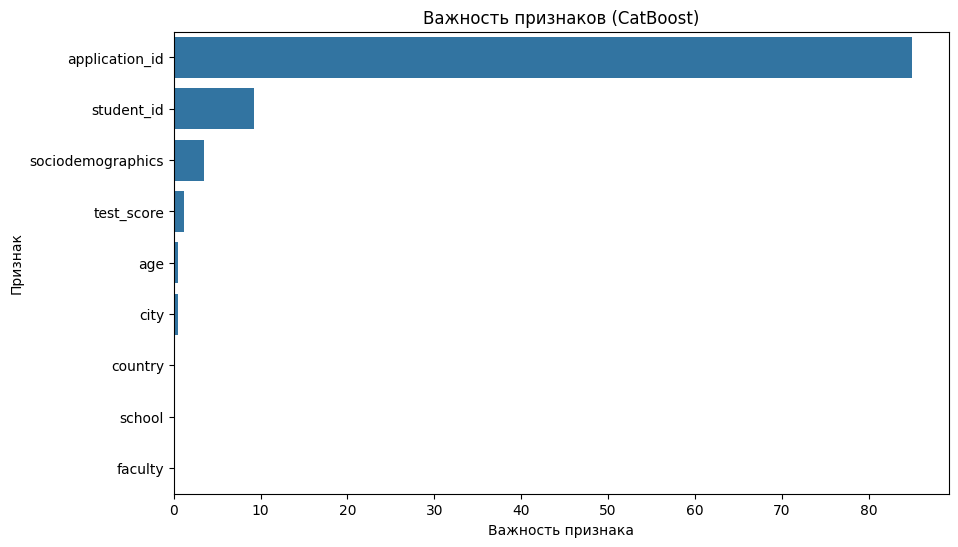

In [ ]:

# 6. Предсказание и оценка
y_pred = model.predict(test_pool)
accuracy = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 7. Важность признаков
feature_importances = pd.Series(model.get_feature_importance(train_pool), index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков (CatBoost)')
plt.show()




In [ ]:
# 1. Сортировка:
df_sorted = train.sort_values('sociodemographics')
df_sorted[['sociodemographics', 'accepted']] # Вывод первых 20 строк для анализа


,sociodemographics,accepted
31140,018b629d5bb1e0a83ccbbbf278e6a3bb,1.0
53891,018b629d5bb1e0a83ccbbbf278e6a3bb,0.0
39646,018b629d5bb1e0a83ccbbbf278e6a3bb,0.0
25962,018b629d5bb1e0a83ccbbbf278e6a3bb,1.0
93998,018b629d5bb1e0a83ccbbbf278e6a3bb,1.0
...,...,...
10770,ff43c402b75de2419d4bdf4b96ea6c40,0.0
72056,ff43c402b75de2419d4bdf4b96ea6c40,0.0
17859,ff43c402b75de2419d4bdf4b96ea6c40,0.0
72027,ff43c402b75de2419d4bdf4b96ea6c40,1.0


In [ ]:

# 2. Группировка:
grouped = train.groupby('sociodemographics')['accepted'].agg(['count', 'mean', 'sum'])
print(grouped.head(20)) # Вывод первых 20 групп


                                  count      mean    sum
sociodemographics                                       
018b629d5bb1e0a83ccbbbf278e6a3bb   1254  0.244817  307.0
02c5b0703591918580defbd01237f650   1375  0.434909  598.0
035fc68d3b01212436f45052d220f797   1368  0.311404  426.0
05ec3873d1ced60fb3d4327bfd368e00   1305  0.361686  472.0
10e4180bd42c7cb8a9b203d61b32fd4c   1294  0.391808  507.0
1533b17f2c49fec036550ee67955b0a6   1414  0.310467  439.0
185ff2a5e1230ddb0434975524432a6c   1408  0.257102  362.0
1b38f9e57a4b0eee0bb9e93b3e80a04b   1417  0.429781  609.0
1c49df9618d0ff1037c90c1f4f6afc0e   1321  0.241484  319.0
1ce8f0f5d51b4aff1ee813b131ee7c88   1287  0.378399  487.0
1ea890ba66b35fcf482e1a13d7b20f11   1371  0.361780  496.0
1f63c614a798186e5b5dbca02201a070   1297  0.313801  407.0
20f533cfdc12970d061eae62e09deb73   1405  0.380783  535.0
24b8a0d628218b1c58a654e98303dc3d   1324  0.224320  297.0
25475d9d46d73155c3e20850c38fc32a   1308  0.356269  466.0
2a351f06a09d28b40e254028aa3bc11

In [ ]:
# Проверка на явные зависимости (например, все заявки с одинаковым ID имеют одинаковый результат):
print("\nВсе ли заявки с одинаковым ID имеют одинаковый 'accepted'?")
print(all(grouped['mean'].isin([0, 1]))) # True, если все значения mean равны 0 или 1



Все ли заявки с одинаковым ID имеют одинаковый 'accepted'?
False


In [ ]:
print("Train items in test:", pd.Series(train["application_id"].unique()).isin(test["application_id"].unique()).sum())

Train items in test: 87


In [ ]:
def sort_train_dataset(train):
  train_sorted = train.sort_values(by='accepted')
  return train_sorted

In [ ]:
st_id_sorted = sort_train_dataset(train)

In [ ]:
st_id_sorted[55000:55050]

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted
33111,17,Беларусь,Гродно,1,2,4523042,c619abe4f81881b4d4556094b7c7b640,37.0,d7bed39abc84d3772de6072262a6a489,0.0
1258,20,Беларусь,Гродно,15,0,6499032,aa3299835464e148e6a1a42d2add53b7,11.0,f81c004758bb53304db830603560fde7,0.0
33112,20,Украина,Харьков,2,2,4901667,bc9aafd289de250b9fd6f19c94ab077c,8.0,c006d95a84501da93f33f81ea4ab4876,0.0
1256,19,Россия,Иркутск,18,0,5403307,cea086b90094612fc3072f9037bf6307,44.0,1f883d9cd048f0cc119be0feea0ffe5f,0.0
1264,23,Беларусь,Витебск,9,0,7348138,9dd02374faf34265f9bf0f6410a3cbcd,23.0,bcae7cbadce57a46a639120e6393becd,0.0
33114,20,Беларусь,Гродно,13,2,3329377,999de5aeac0e15044bd2b893f331dd61,83.0,3e9bc427bc035d3fd0d04396d6b2595b,0.0
33115,23,Россия,Новокузнецк,6,2,2254813,1533b17f2c49fec036550ee67955b0a6,9.0,57da13b2abb3abafd0f004a85f34c722,0.0
1253,18,Украина,Киев,14,0,4491985,97f8e028fff950455ca9088aa64f6fd0,100.0,d1bae65f48108f50403918b1d9978e28,0.0
1252,25,Казахстан,Астана,2,0,9481666,10e4180bd42c7cb8a9b203d61b32fd4c,59.0,26c9c921d85d4fc5478263752fca1109,0.0
1250,24,Казахстан,Алматы,15,0,3243655,4843860eb8d7bef21a5894797af4970a,84.0,9de884ab3004bc7810ab948f1e25a78c,0.0


In [ ]:
sort_train_dataset(test)

,ID,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,personal_statement
18799,114799,24,Россия,Набережные Челны,12,3,1000323,67086df93882a3958b6163a60d0bd6b5,72.48,8bb2b4bafab38ad0b32fa22d6f771ffa,NaN
17438,113438,20,Казахстан,Караганда,6,2,1001217,4770b72d5089a17da7bd0c67a41d4e32,30.00,ab90d70d1628461dcc362803d3e70e1a,NaN
18301,114301,22,Казахстан,Павлодар,6,3,1001436,05ec3873d1ced60fb3d4327bfd368e00,11.00,0c4fe22228fae58059ebb86466cbb657,NaN
17023,113023,23,Украина,Одесса,10,2,1002853,dadaef222d17af71e34a4d39f182d7ae,86.00,2372bd7ea78954c223265273afd12bb5,NaN
12915,108915,17,Украина,Львов,20,0,1003207,f1eef626c29a481a5527d242ae5516a8,7.00,54ac40548c32f63294290a4114100387,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5470,101470,18,Казахстан,Шымкент,4,2,9998141,de6753fb488b87117296d8bef2edc7b3,39.00,5fec7fabff96b2c57562b2179ee2b8cc,NaN
14975,110975,21,Казахстан,Алматы,12,1,9998300,99fec0c12216abee9eec3bee2138754f,37.00,bd66ef26ce1639b3a070fac3fd38fbf8,NaN
13873,109873,21,Казахстан,Алматы,12,0,9998300,99fec0c12216abee9eec3bee2138754f,37.00,bd66ef26ce1639b3a070fac3fd38fbf8,NaN
23567,119567,19,Украина,Львов,1,5,9998332,25475d9d46d73155c3e20850c38fc32a,95.00,2ea3904d9c36cd12abb3ae92ae6d5095,NaN
